# Trabajo de Gonzalo Giosa: ML Engineer Challenge - LATAM Airlines

En esta etapa se tenia como objetivo enriquecer el data set con variables externas con el fin de mejorar el rendimiento de los modelos. Para lograr eso recurrí a la búsqueda de datos en la web y los resultados fueron muy alentadores. Para cada vuelo ahora se cuenta con la siguiente información:
 
* *Internas*     --------------------------
* *Fecha-I* : Fecha y hora programada del vuelo.
* *Vlo-I* : Número de vuelo programado.
* *Ori-I* : Código de ciudad de origen programado.
* *Des-I* : Código de ciudad de destino programado.
* *Emp-I* : Código aerolínea de vuelo programado.
* *Fecha-O* : Fecha y hora de operación del vuelo.
* *Vlo-O* : Número de vuelo de operación del vuelo.
* *Ori-O* : Código de ciudad de origen de operación
* *Des-O* : Código de ciudad de destino de operación.
* *Emp-O* : Código aerolínea de vuelo operado.
* *DIA* : Día del mes de operación del vuelo.
* *MES* : Número de mes de operación del vuelo.
* *AÑO* : Año de operación del vuelo.
* *DIANOM* : Día de la semana de operación del vuelo.
* *TIPOVUELO* : Tipo de vuelo, I =Internacional, N =Nacional.
* *OPERA* : Nombre de aerolínea que opera.
* *SIGLAORI* : Nombre ciudad origen.
* *SIGLADES* : Nombre ciudad destino.
* *Externas     --------------------------*
* *KM_OvsD* : Distancia en kilómetros entre la ciudad de origen y la ciudad de destino del vuelo. 
* *t_media* : Temperatura media en grados para el día específico del vuelo
* *t_max* : Temperatura maxima en grados para el día específico del vuelo
* *t_min* : Número de vuelo programado.
* *v_media_viento* : Velicidad del viento en km/h para el día específico del vuelo 
* *presion_media* : Presion media en hectopascales para el día específico del vuelo
* *cantidad_de_lluvia_mm* : Cantidad de lluvia mensual promedio en milímetros para el mes específico del vuelo 
* *nubosidad_perc* : Porcentaje de nubosidad mensual promedio para el mes especifico del vuelo

### Librerias

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

### Enrichment con data externa

In [21]:
path_data_externa = '../data/externa/'

data_km = pd.read_csv(f'{path_data_externa}KM-Origen-vs-Destino.csv') #https://www.distance.to/
lluvia_nubosidad_mes = pd.read_csv(f'{path_data_externa}lluvia_nubosidad_mes.csv') #http://www.meteochile.gob.cl/PortalDMC-web/index.xhtml
data_meteorologica_diaria = pd.read_csv(f'{path_data_externa}data_meteorologica_diaria.csv') #https://www.meteored.cl/

In [22]:
# merge data externa con el dataset original

path_data_raw = '../data/raw/'

df = pd.read_csv(f'{path_data_raw}dataset_SCL.csv')

df = pd.merge(df, data_km, on="SIGLADES", how="left")
df = pd.merge(df, lluvia_nubosidad_mes, on=["AÑO", "MES"], how="left")
df = pd.merge(df, data_meteorologica_diaria, on=["AÑO", "MES", "DIA"], how="left")

In [23]:
display(df.head(2))
df.shape


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,KM-OvsD,Cantidad_de_lluvia,Nubosidad_perc,T_MEDIA,T_MAX,T_MIN,V_MEDIA_VIENTO,PRESION_MEDIA
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,6664.71,0.0,17.6,25.0,31.0,14.0,7.8,1017.1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,6664.71,0.0,17.6,26.0,31.0,16.0,10.2,1015.7


(68206, 26)

In [24]:
# arreglamos el formato de los nombres de las variables

df.columns = [col.lower() for col in df.columns]
df.rename(columns={'km-ovsd':'km_ovsd'}, inplace=True)
print(df.columns)

Index(['fecha-i', 'vlo-i', 'ori-i', 'des-i', 'emp-i', 'fecha-o', 'vlo-o',
       'ori-o', 'des-o', 'emp-o', 'dia', 'mes', 'año', 'dianom', 'tipovuelo',
       'opera', 'siglaori', 'siglades', 'km_ovsd', 'cantidad_de_lluvia',
       'nubosidad_perc', 't_media', 't_max', 't_min', 'v_media_viento',
       'presion_media'],
      dtype='object')


In [25]:
df.shape

(68206, 26)

In [26]:
ser = df.isna().sum()/len(df)
ser[ser>0].sort_values(ascending=False)

t_media           0.149576
t_max             0.149576
t_min             0.149576
v_media_viento    0.149576
presion_media     0.149576
vlo-o             0.000015
dtype: float64

In [27]:
df.describe()

,dia,mes,año,km_ovsd,cantidad_de_lluvia,nubosidad_perc,t_media,t_max,t_min,v_media_viento,presion_media
count,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,58004.000000,58004.000000,58004.000000,58004.000000,58004.000000
mean,15.714790,6.622585,2017.000029,2155.106884,17.780233,37.006866,17.294687,21.630112,9.376905,6.432893,1017.359048
std,8.782886,3.523321,0.005415,2354.386615,25.156236,17.345541,6.088891,7.008649,4.805874,2.125857,3.229276
min,1.000000,1.000000,2017.000000,172.470000,0.000000,9.700000,4.000000,6.000000,-1.000000,0.900000,1009.600000
25%,8.000000,3.000000,2017.000000,918.820000,1.500000,17.600000,12.000000,16.000000,6.000000,4.800000,1015.000000
50%,16.000000,7.000000,2017.000000,1229.560000,2.000000,29.700000,17.000000,22.000000,9.000000,6.300000,1016.800000
75%,23.000000,10.000000,2017.000000,2466.620000,21.800000,53.500000,22.000000,28.000000,13.000000,8.000000,1019.500000
max,31.000000,12.000000,2018.000000,11901.660000,82.400000,59.900000,30.000000,36.000000,28.000000,13.900000,1029.600000


In [28]:
df.select_dtypes(exclude='object').dtypes

dia                     int64
mes                     int64
año                     int64
km_ovsd               float64
cantidad_de_lluvia    float64
nubosidad_perc        float64
t_media               float64
t_max                 float64
t_min                 float64
v_media_viento        float64
presion_media         float64
dtype: object

In [29]:
df.columns

Index(['fecha-i', 'vlo-i', 'ori-i', 'des-i', 'emp-i', 'fecha-o', 'vlo-o',
       'ori-o', 'des-o', 'emp-o', 'dia', 'mes', 'año', 'dianom', 'tipovuelo',
       'opera', 'siglaori', 'siglades', 'km_ovsd', 'cantidad_de_lluvia',
       'nubosidad_perc', 't_media', 't_max', 't_min', 'v_media_viento',
       'presion_media'],
      dtype='object')

In [30]:
# guardamos el dataset enriquecido con la data externa

path_data_enriched = '../data/enriched/'

df.to_csv(f'{path_data_enriched}dataset_SCL_enriched.csv')

In [43]:
var_target = ['fecha-i','fecha-o']
var_no_info = ['vlo-i','ori-i','vlo-o','siglaori']
var_redundant = ['des-i','emp-i','ori-o','des-o','emp-o']

var_pred = ['dia','mes','año','dianom','tipovuelo','opera','siglades'
            ,'km_ovsd','t_media','t_max', 't_min','v_media_viento','presion_media'
            ,'cantidad_de_lluvia','nubosidad_perc'
            ]

var_propias = ['km_ovsd','t_media','t_max', 't_min','v_media_viento','presion_media'
               ,'cantidad_de_lluvia','nubosidad_perc']

### EDA para las variables originales

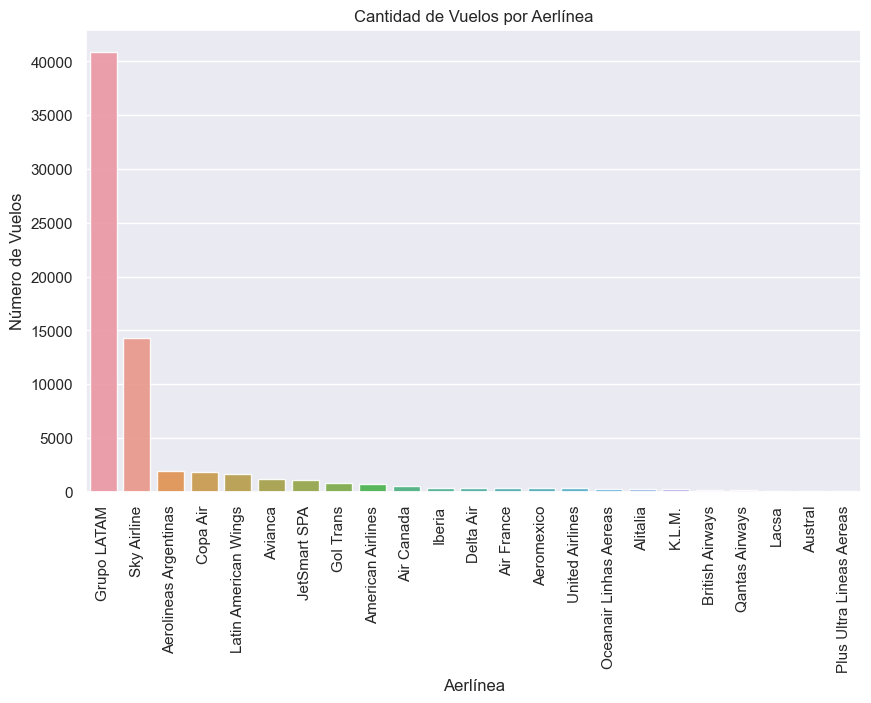

In [31]:
vuelos_aerolineas = df['opera'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.barplot(x=vuelos_aerolineas.index, y=vuelos_aerolineas.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Aerlínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerlínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

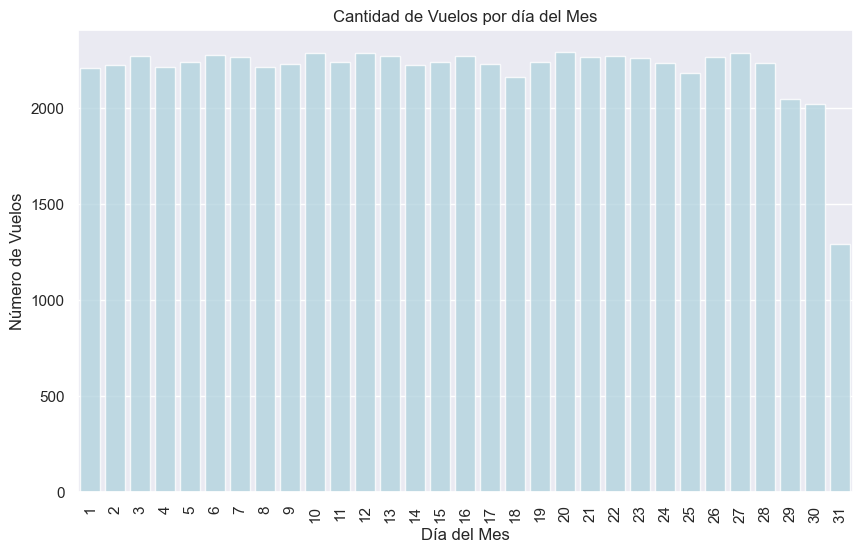

In [32]:
vuelos_dia = df['dia'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_dia.index, y=vuelos_dia.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

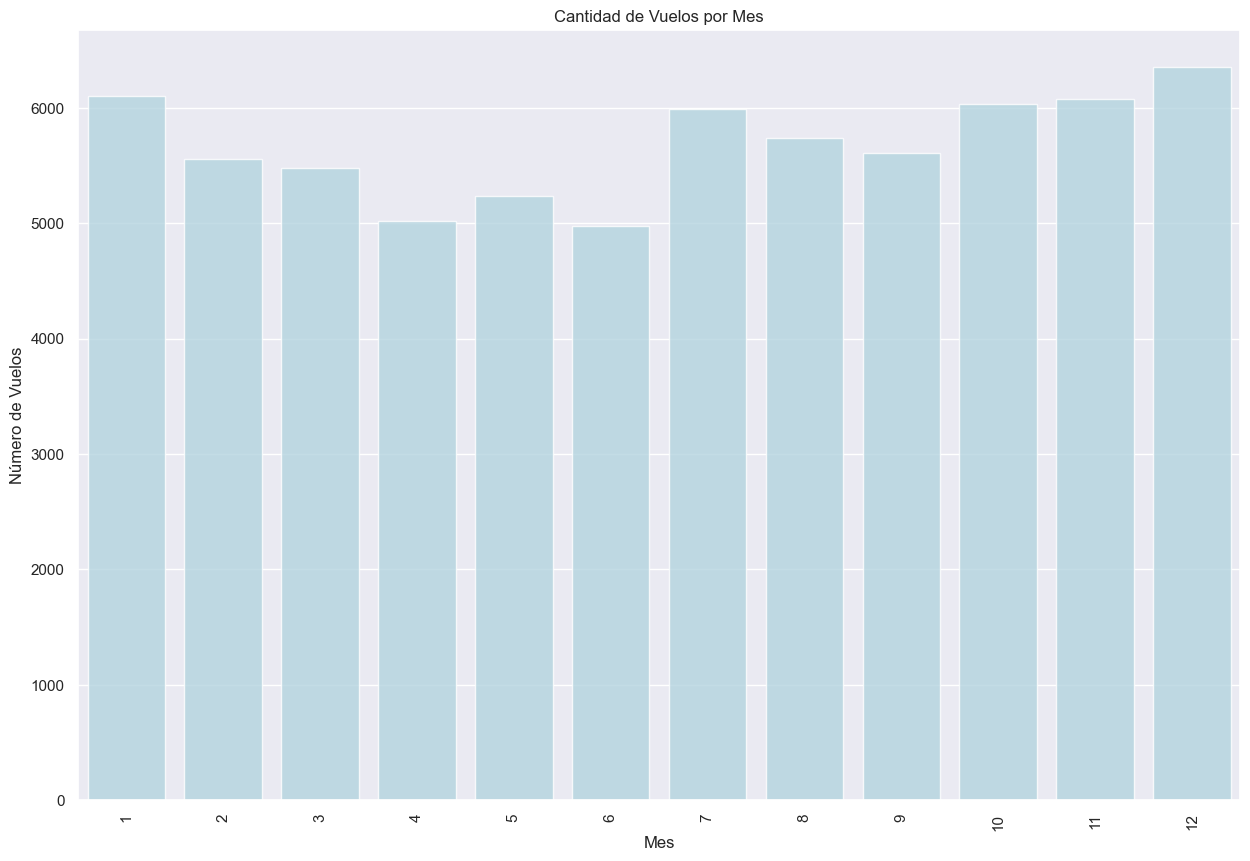

In [33]:
vuelos_mes = df['mes'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_mes.index, y=vuelos_mes.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

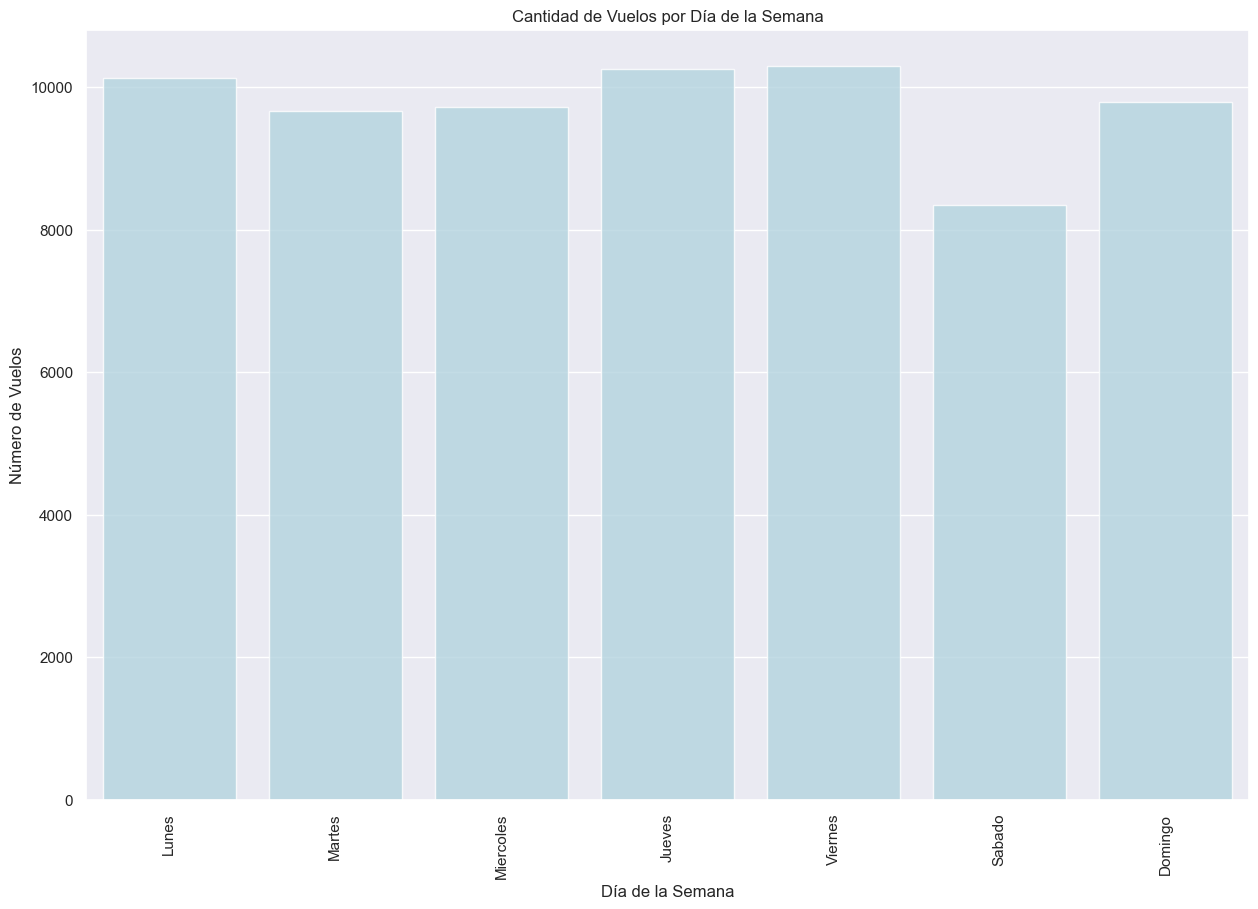

In [34]:
vuelos = df['dianom'].value_counts()
dias = [vuelos.index[2], vuelos.index[5], vuelos.index[4], vuelos.index[1], vuelos.index[0], vuelos.index[6], vuelos.index[3]]
valores_dias = [vuelos.values[2], vuelos.values[5], vuelos.values[4], vuelos.values[1], vuelos.values[0], vuelos.values[6], vuelos.values[3]]

sns.set(style="darkgrid")
sns.barplot(x=dias, y=valores_dias, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Día de la Semana')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

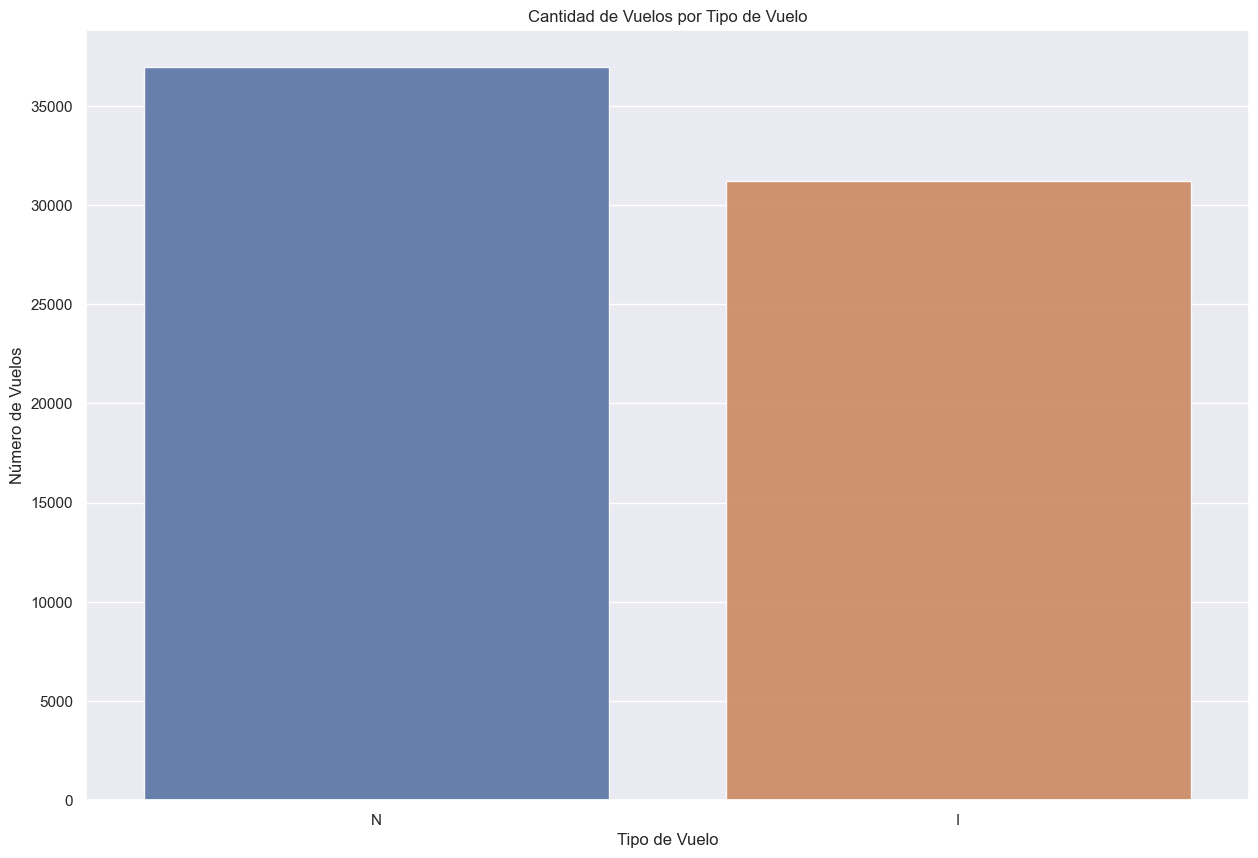

In [35]:
vuelos = df['tipovuelo'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos.index, y=vuelos.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Tipo de Vuelo')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

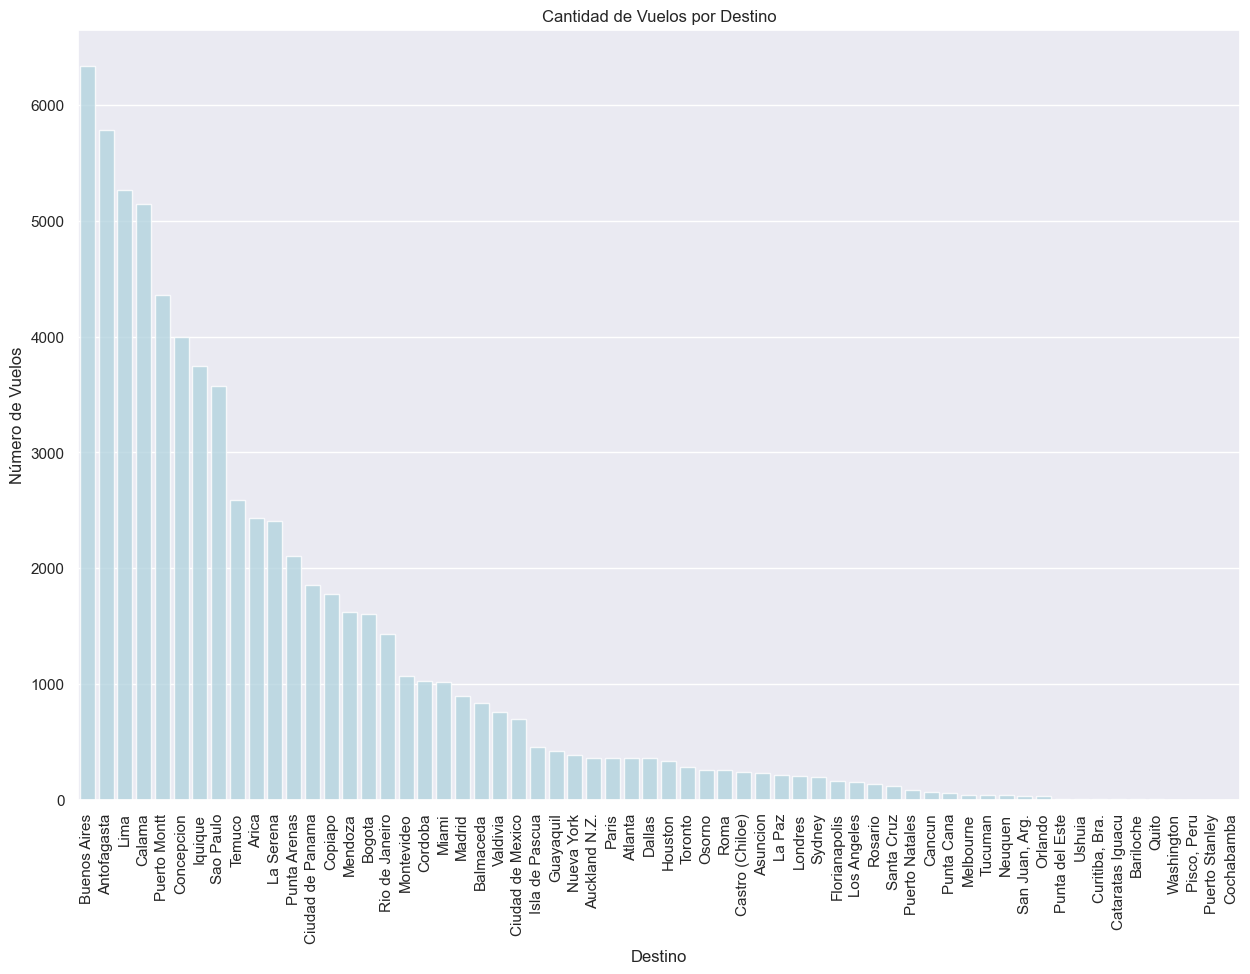

In [36]:
vuelos = df['siglades'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos.index, y=vuelos.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Destino')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)

plt.show()

### EDA para las variables propias

In [44]:
var_propias

['km_ovsd',
 't_media',
 't_max',
 't_min',
 'v_media_viento',
 'presion_media',
 'cantidad_de_lluvia',
 'nubosidad_perc']

In [45]:
df[var_propias].dtypes

km_ovsd               float64
t_media               float64
t_max                 float64
t_min                 float64
v_media_viento        float64
presion_media         float64
cantidad_de_lluvia    float64
nubosidad_perc        float64
dtype: object

t_media


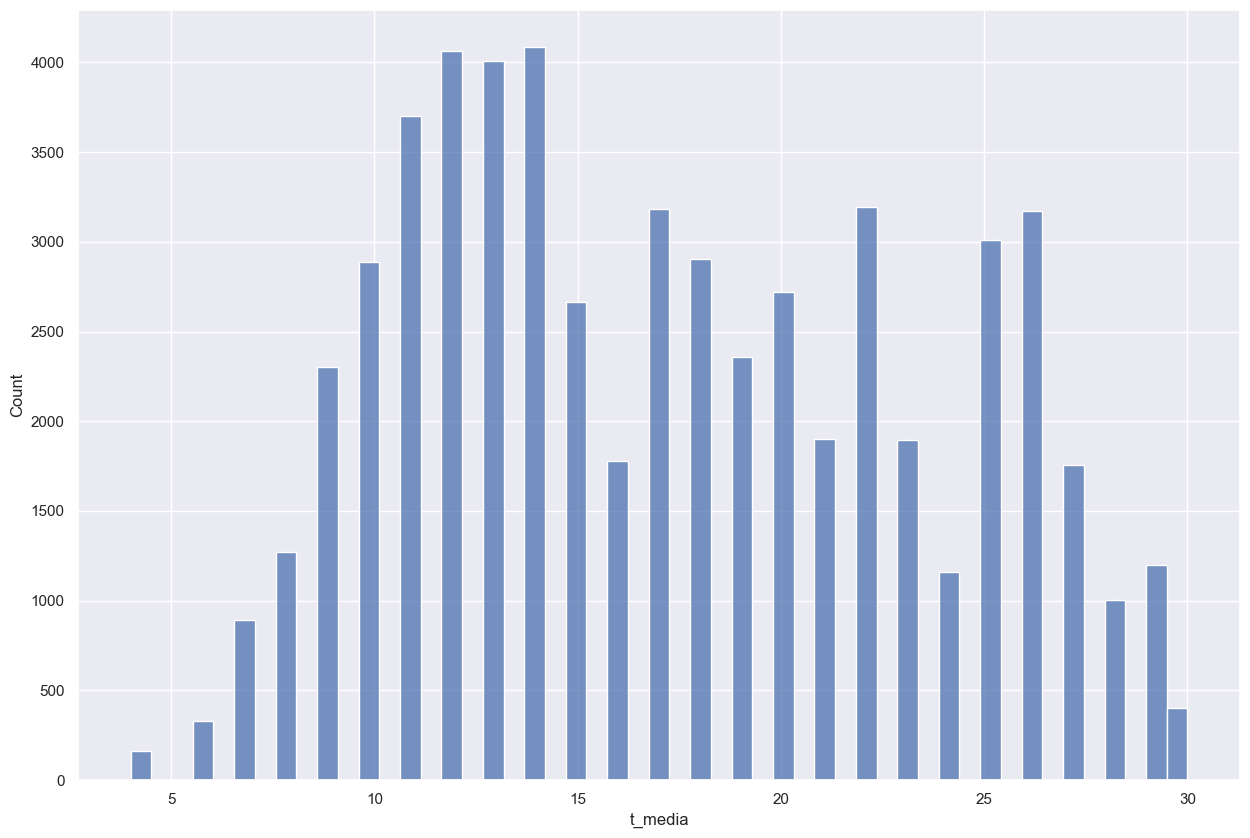

t_max


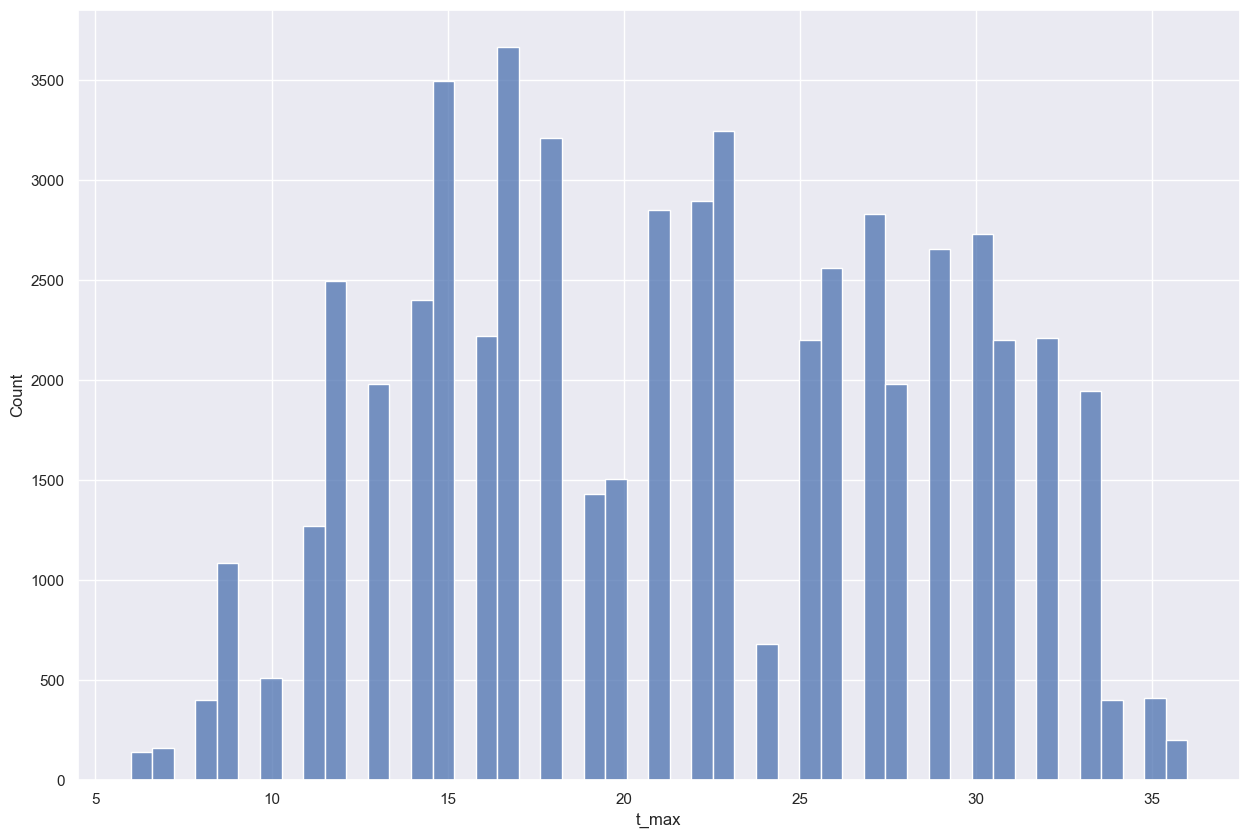

t_min


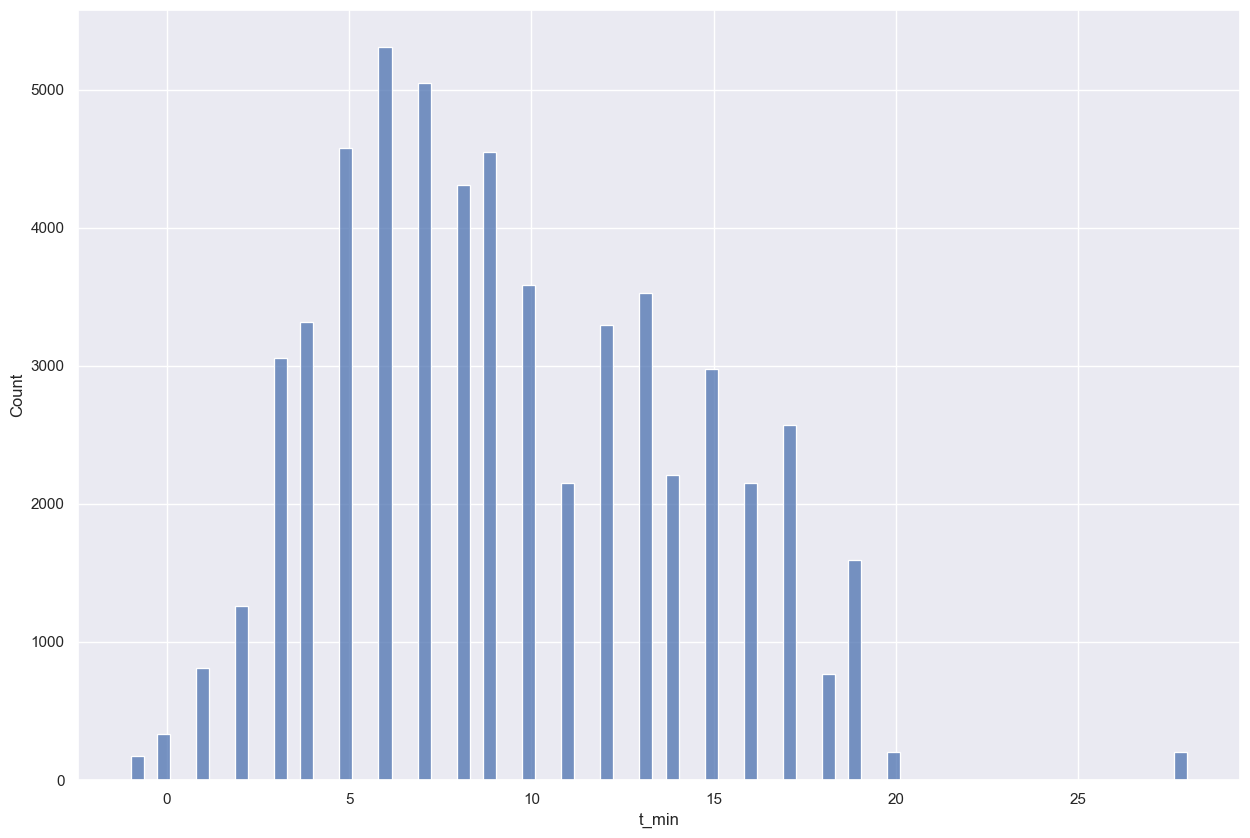

v_media_viento


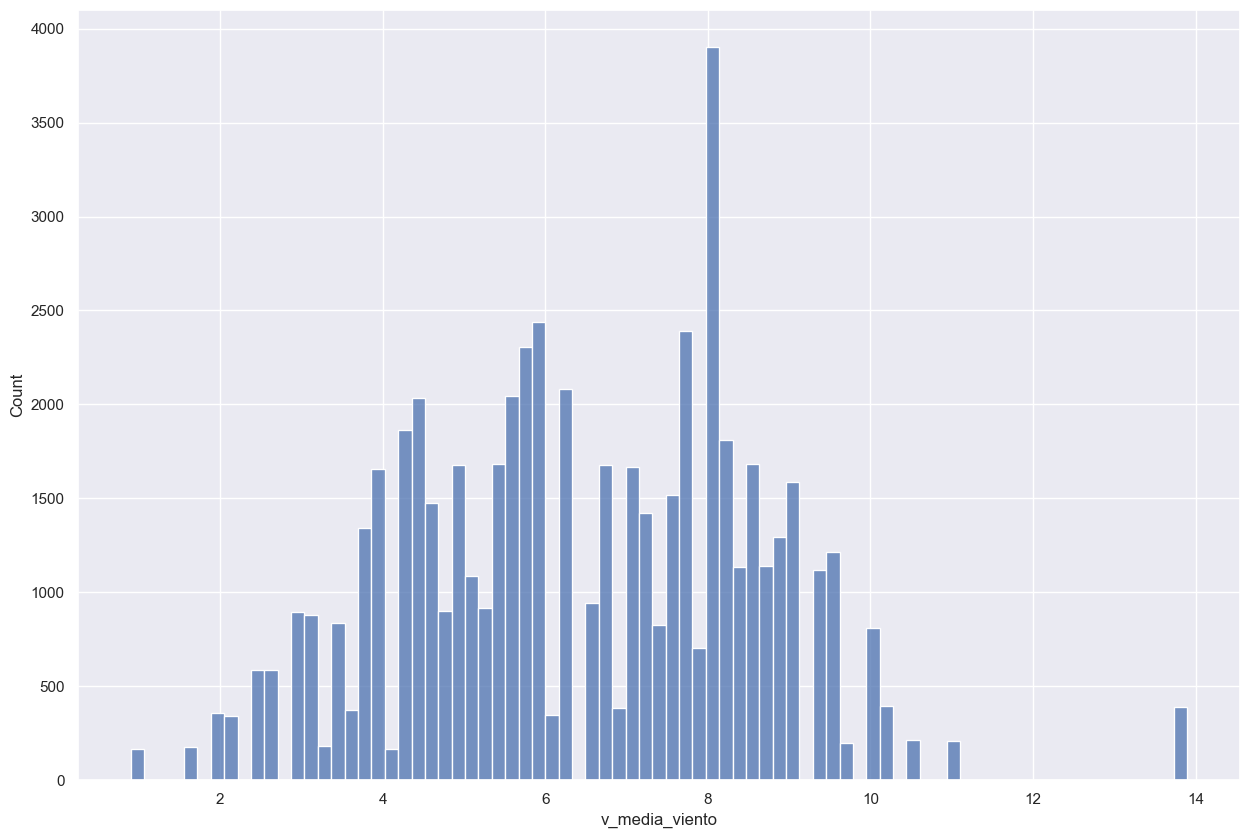

presion_media


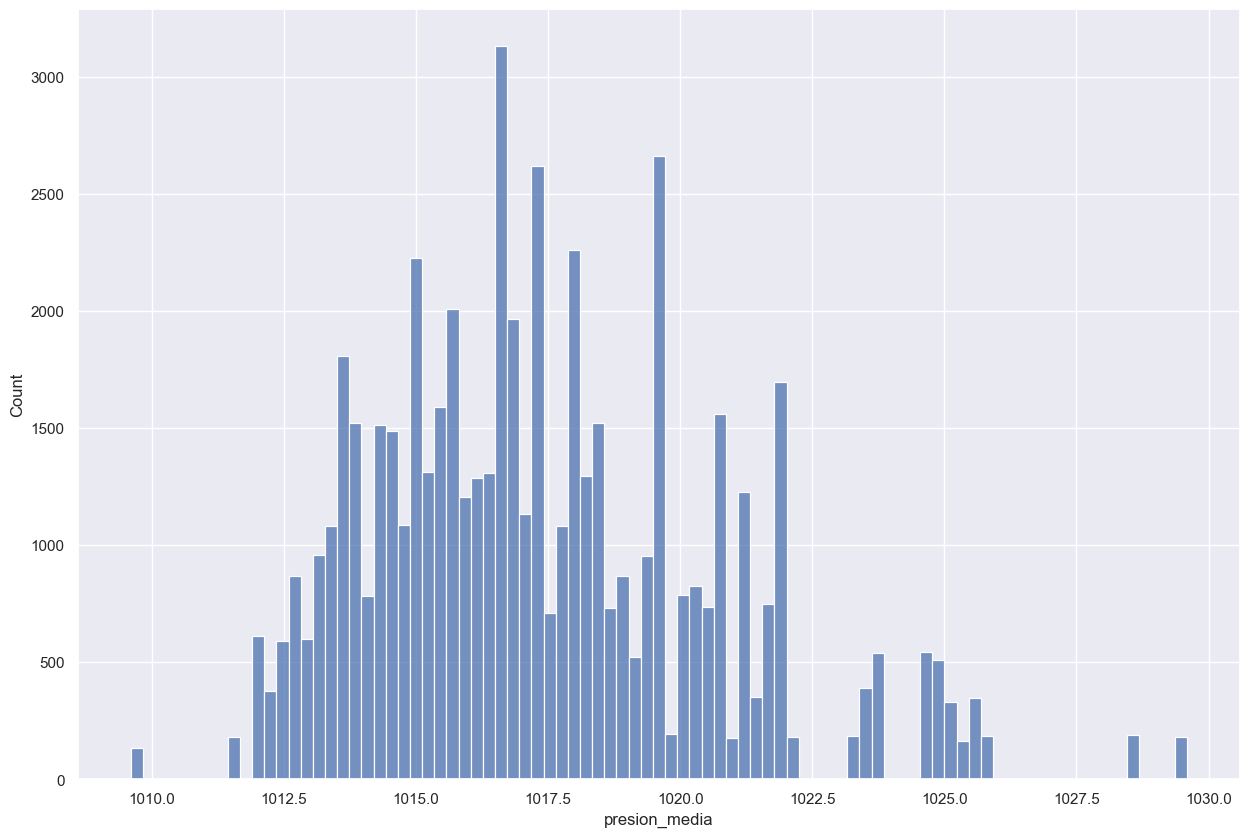

cantidad_de_lluvia


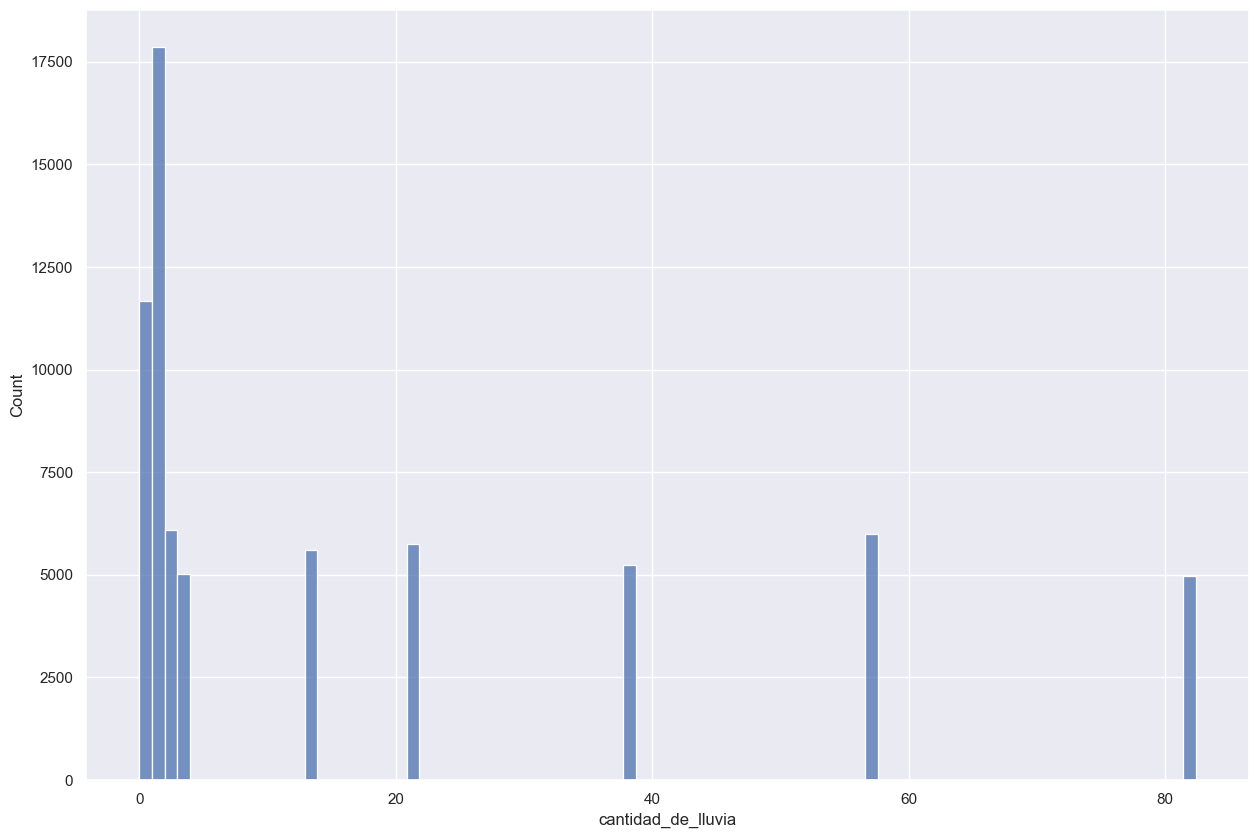

nubosidad_perc


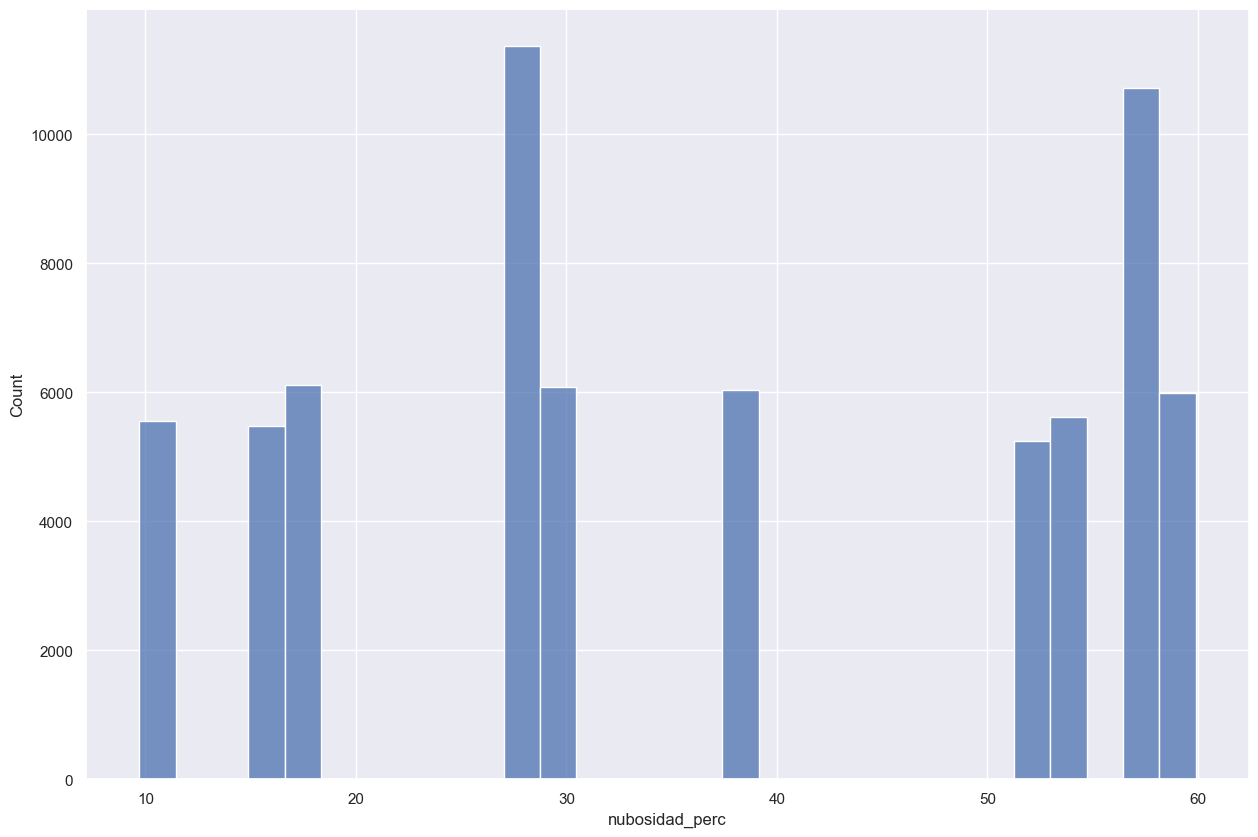

In [46]:
for col in var_propias[1:]:
    print(col)
    #sns.histplot(df[col])
    sns.histplot(df[col])
    plt.show()

### Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* **temporada_alta** : 1 si **Fecha-I** está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [32]:
from datetime import datetime

def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0
    

In [33]:
df['fecha-i'] = pd.to_datetime(df['fecha-i'])
df['fecha-i'] = df['fecha-i'].astype('str')

In [34]:
df['fecha-i'].head()

0    2017-01-02 06:05:00
1    2017-01-03 06:05:00
2    2017-01-04 06:05:00
3    2017-01-05 06:05:00
4    2017-01-06 06:05:00
Name: fecha-i, dtype: object

In [35]:
df['temporada_alta'] = df['fecha-i'].apply(temporada_alta)

In [36]:
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

* **dif_min** : diferencia en minutos entre **Fecha-O** y **Fecha-I** .

In [37]:
def dif_min(data):
    fecha_o = datetime.strptime(data['fecha-o'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['fecha-i'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min
        

In [38]:
df['fecha-o'] = pd.to_datetime(df['fecha-o'])
df['fecha-o'] = df['fecha-o'].astype('str')

In [39]:
df['dif_min'] = df.apply(dif_min, axis = 1)

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [40]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

In [41]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

In [42]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time()
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()
    
    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'

In [43]:
df['periodo_dia'] = df['fecha-i'].apply(get_periodo_dia)

In [44]:
df.periodo_dia.value_counts(1)

tarde     0.374015
mañana    0.371282
noche     0.254703
Name: periodo_dia, dtype: float64

In [45]:
df[['temporada_alta','dif_min','atraso_15','periodo_dia']+var_propias].to_csv('synthetic_features.csv', index = False)

### ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

* ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [46]:
def calcular_tasa(df, columna):
    
    dic_atrasos = {}
    for _, row in df.iterrows():
        if row['atraso_15'] == 1:
            if row[columna] not in dic_atrasos:
                dic_atrasos[row[columna]] = 1
            else:
                dic_atrasos[row[columna]] += 1
    
    total_values = df[columna].value_counts()
    
    dic_tasas = {}
    for name, total in total_values.iteritems():
        if name in dic_atrasos:
            dic_tasas[name] = round(total / dic_atrasos[name], 2)
        else:
            dic_tasas[name] = 0
            
    return pd.DataFrame.from_dict(data = dic_tasas, orient = 'index', columns = ['Tasa (%)'])

In [47]:
tasas_destinos = calcular_tasa(df, 'siglades')
tasas_destinos

,Tasa (%)
Buenos Aires,3.91
Antofagasta,6.83
Lima,4.34
Calama,8.18
Puerto Montt,5.94
...,...
Cataratas Iguacu,0.00
"Pisco, Peru",0.00
Puerto Stanley,1.00
Cochabamba,1.00


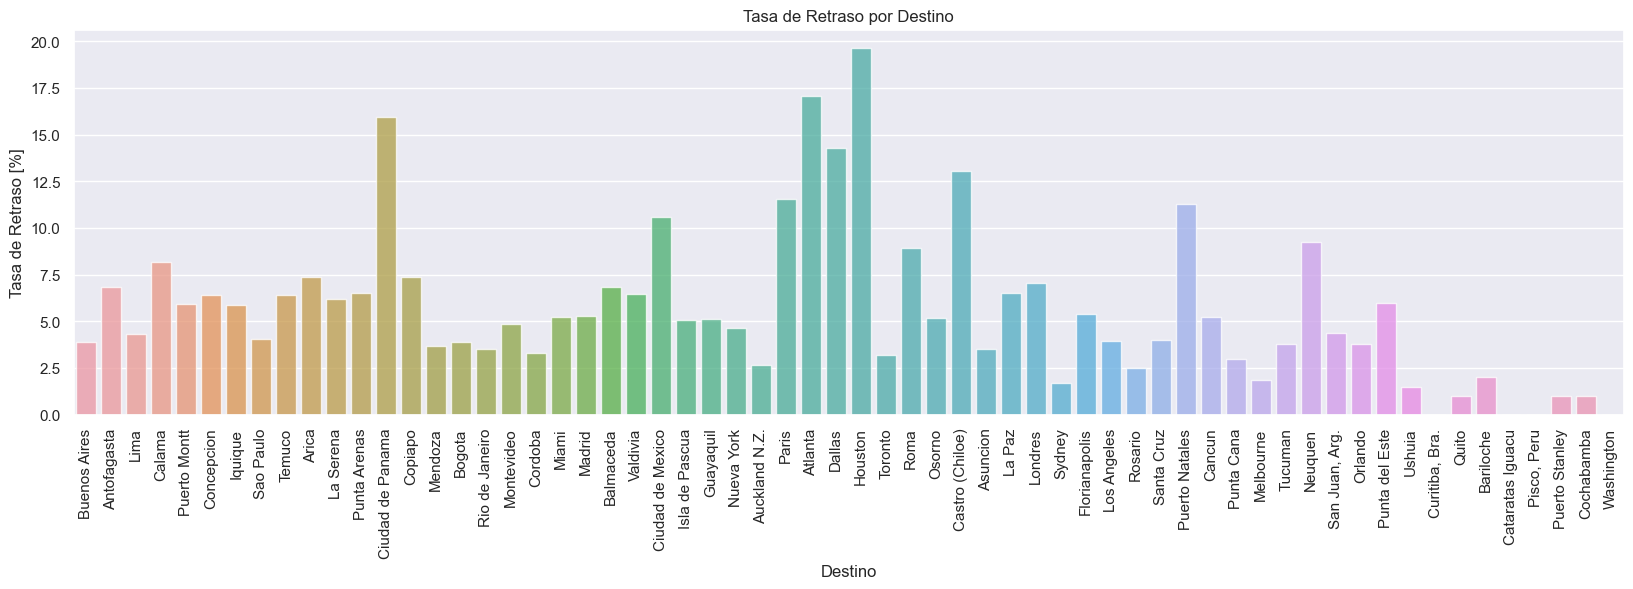

In [48]:
tasas_destinos_values = df['siglades'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=df['siglades'].value_counts().index, y=tasas_destinos['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Destino')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [49]:
tasas_aerolineas = calcular_tasa(df, 'opera')
tasas_aerolineas

,Tasa (%)
Grupo LATAM,5.60
Sky Airline,5.63
Aerolineas Argentinas,4.16
Copa Air,15.95
Latin American Wings,2.46
Avianca,3.76
JetSmart SPA,5.59
Gol Trans,2.81
American Airlines,14.84
Air Canada,2.19


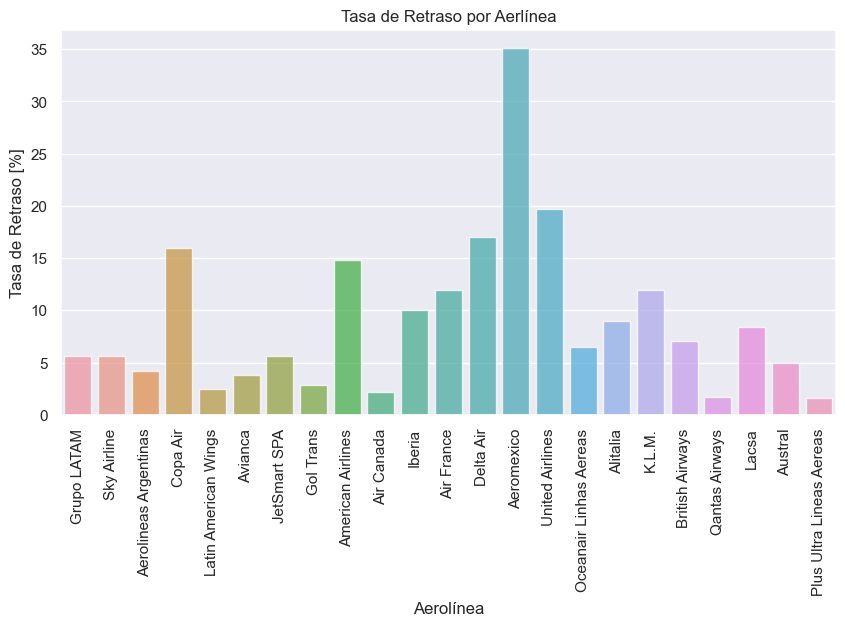

In [50]:
tasas_aerolineas_values = df['opera'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_aerolineas_values, y=tasas_aerolineas['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Aerlínea')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [51]:
tasas_meses = calcular_tasa(df, 'mes')
tasas_meses

,Tasa (%)
12,3.94
1,6.25
11,5.07
10,4.43
7,3.41
8,5.77
9,5.80
2,6.60
3,8.69
5,6.34


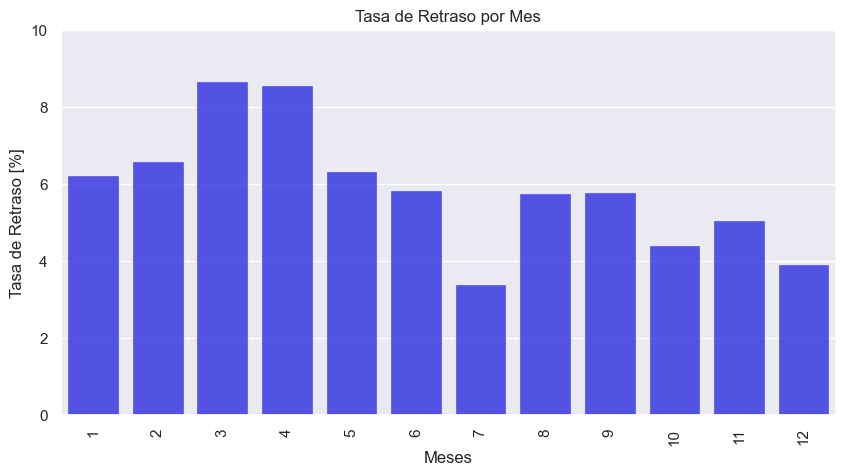

In [52]:
tasas_meses_values = df['mes'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_meses_values, y=tasas_meses['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Mes')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

In [53]:
tasas_dias = calcular_tasa(df, 'dianom')
tasas_dias

,Tasa (%)
Viernes,4.50
Jueves,5.01
Lunes,4.95
Domingo,6.21
Miercoles,5.85
Martes,5.91
Sabado,6.13


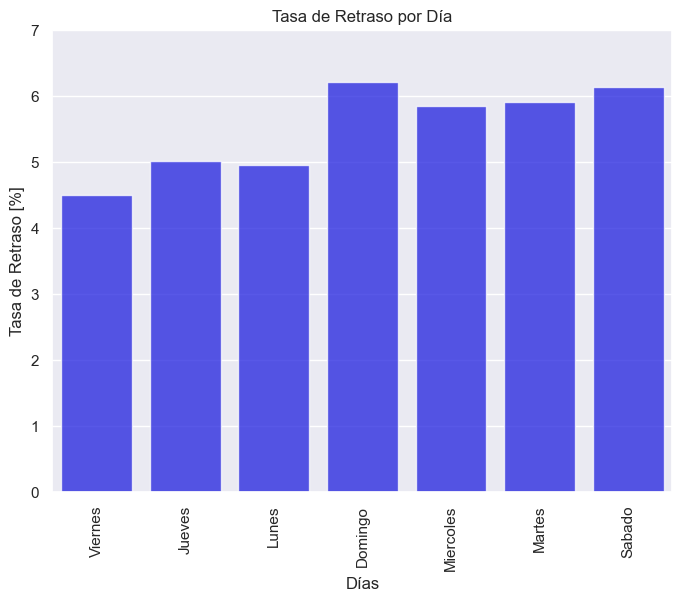

In [54]:
tasas_dias_values = df['dianom'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (8,6))
sns.barplot(x=tasas_dias_values, y=tasas_dias['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Día')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Días', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

In [55]:
tasas_temporada = calcular_tasa(df, 'temporada_alta')
tasas_temporada

,Tasa (%)
0,5.58
1,5.08


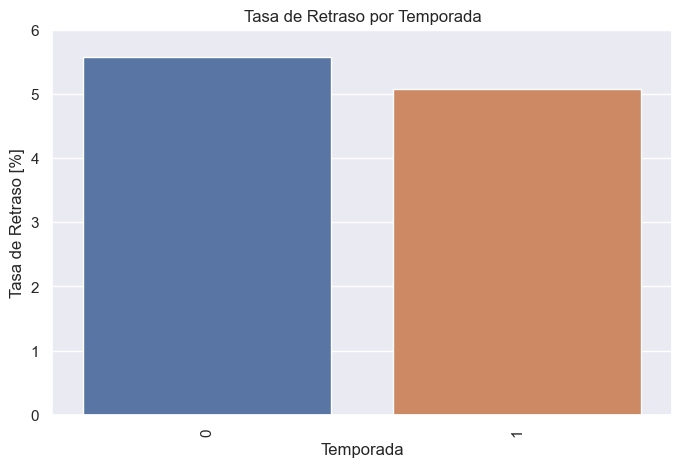

In [56]:
tasas_temporada_values = df['temporada_alta'].value_counts().index

plt.figure(figsize = (8, 5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_temporada_values, y=tasas_temporada['Tasa (%)'])
plt.title('Tasa de Retraso por Temporada')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

In [57]:
tasas_tipovuelo = calcular_tasa(df, 'tipovuelo')
tasas_tipovuelo

,Tasa (%)
N,6.64
I,4.43


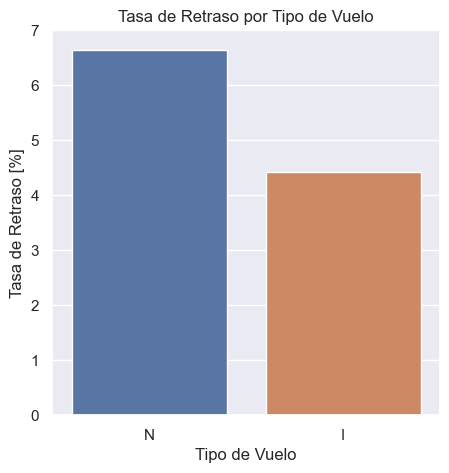

In [58]:
tasas_tipovuelo_values = df['tipovuelo'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_tipovuelo_values, y=tasas_tipovuelo['Tasa (%)'])
plt.title('Tasa de Retraso por Tipo de Vuelo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.ylim(0,7)
plt.show()

In [59]:
tasa_periododia = calcular_tasa(df, 'periodo_dia')
tasa_periododia

,Tasa (%)
tarde,5.06
mañana,6.21
noche,5.02


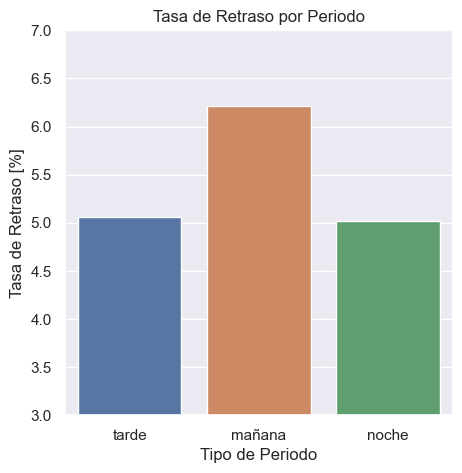

In [60]:
tasas_periodo_values = df['periodo_dia'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_periodo_values, y=tasa_periododia['Tasa (%)'])
plt.title('Tasa de Retraso por Periodo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Periodo', fontsize=12)
plt.ylim(3,7)
plt.show()

In [61]:
var_propias

['tipo_aerolinea',
 'km-ovsd',
 't_media',
 't_max',
 't_min',
 'v_media_viento',
 'presion_media',
 'cantidad_de_lluvia_mm',
 'nubosidad_perc']

In [62]:
df[var_propias].dtypes

tipo_aerolinea            object
km-ovsd                  float64
t_media                  float64
t_max                    float64
t_min                    float64
v_media_viento           float64
presion_media            float64
cantidad_de_lluvia_mm    float64
nubosidad_perc           float64
dtype: object

In [63]:
tasa_periododia = calcular_tasa(df, 'tipo_aerolinea')
tasa_periododia

,Tasa (%)
Tradicional,5.65
Low Cost,4.83


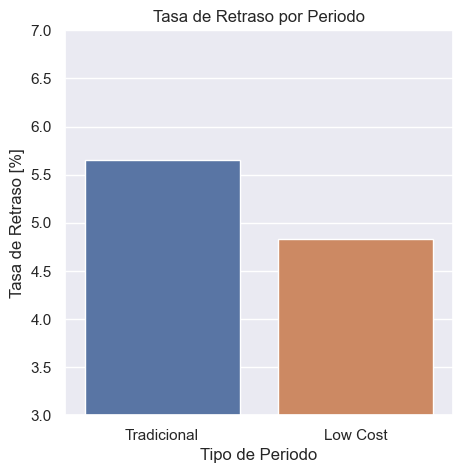

In [64]:
tasas_periodo_values = df['tipo_aerolinea'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_periodo_values, y=tasa_periododia['Tasa (%)'])
plt.title('Tasa de Retraso por Periodo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Periodo', fontsize=12)
plt.ylim(3,7)
plt.show()

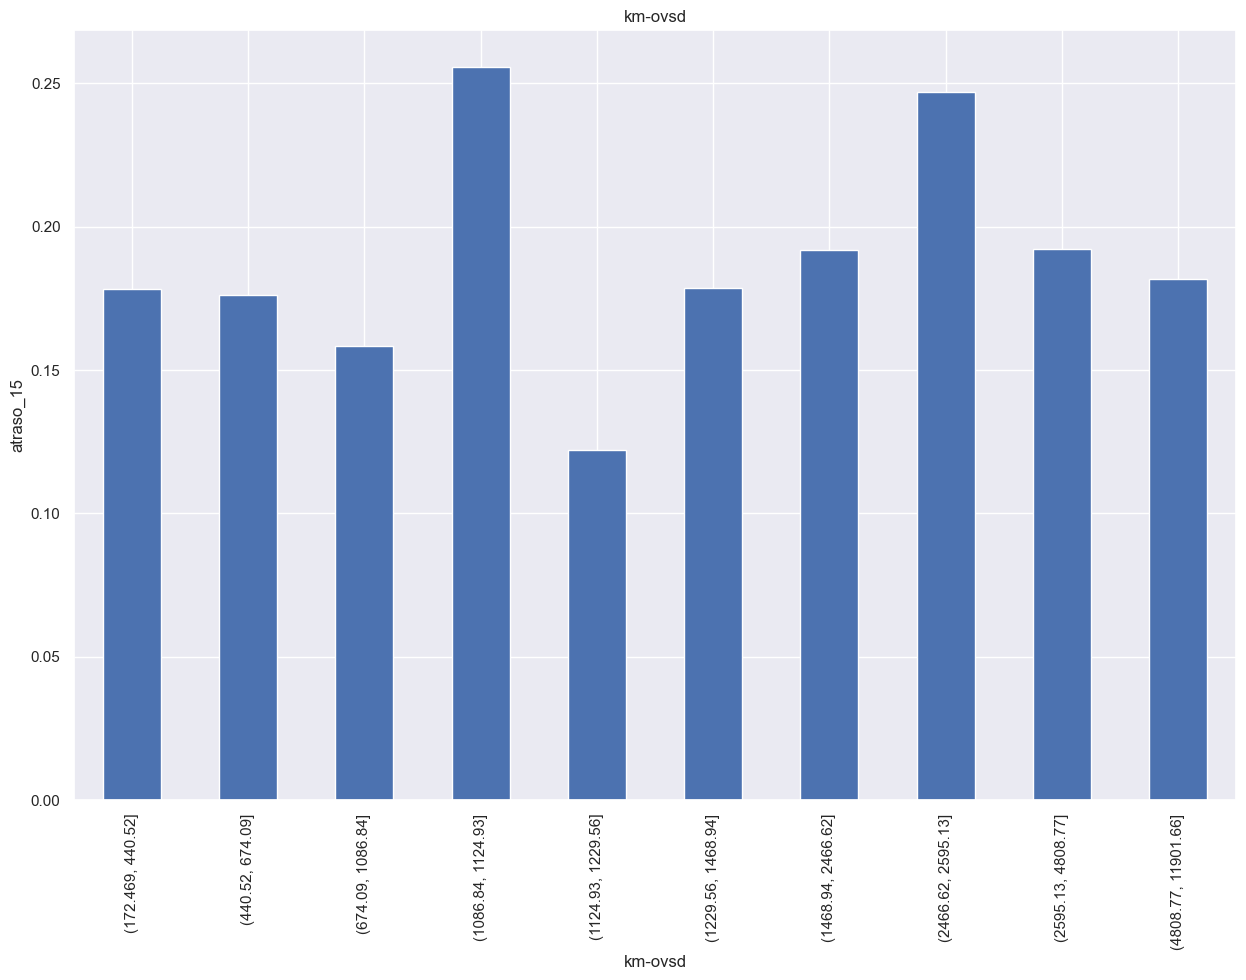

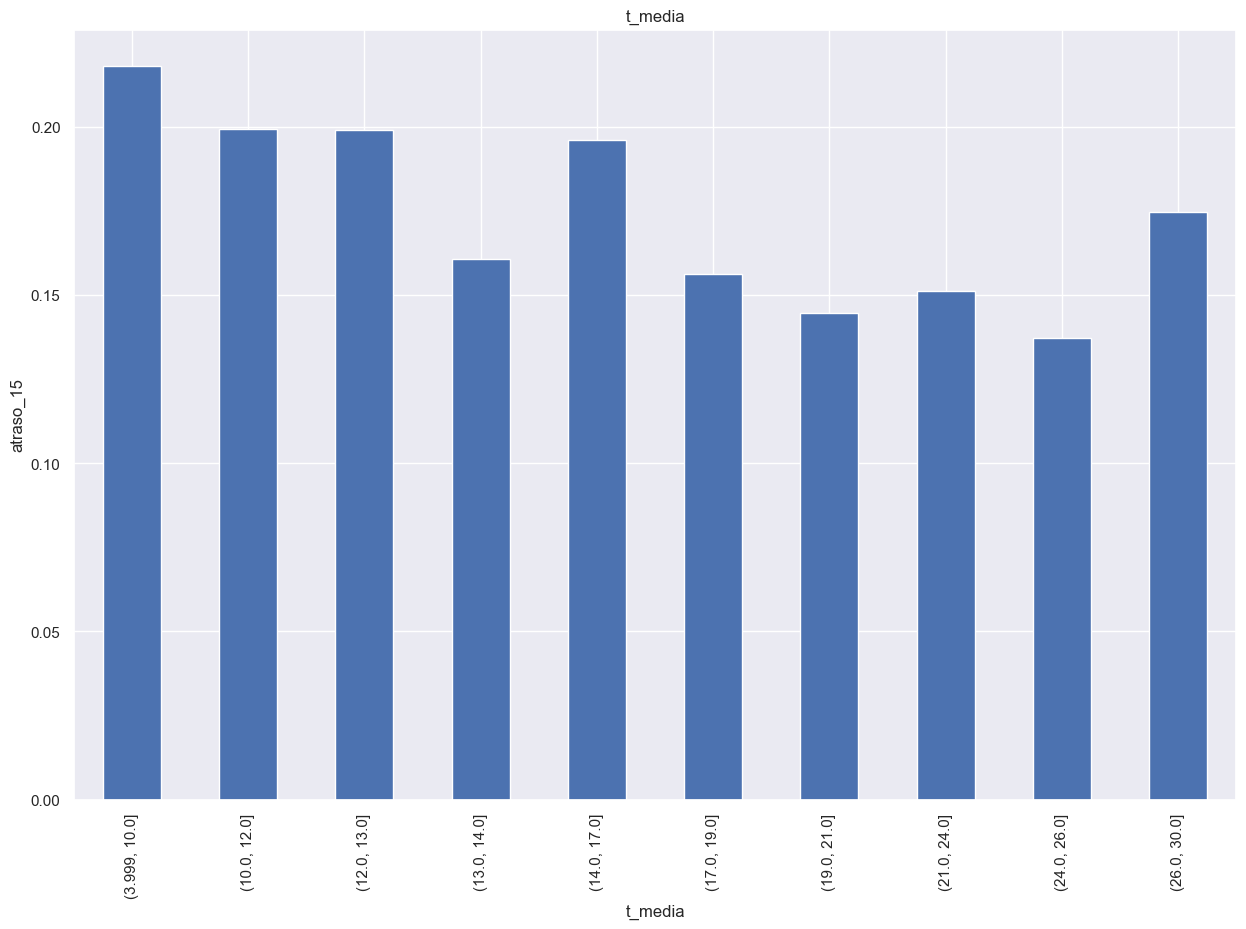

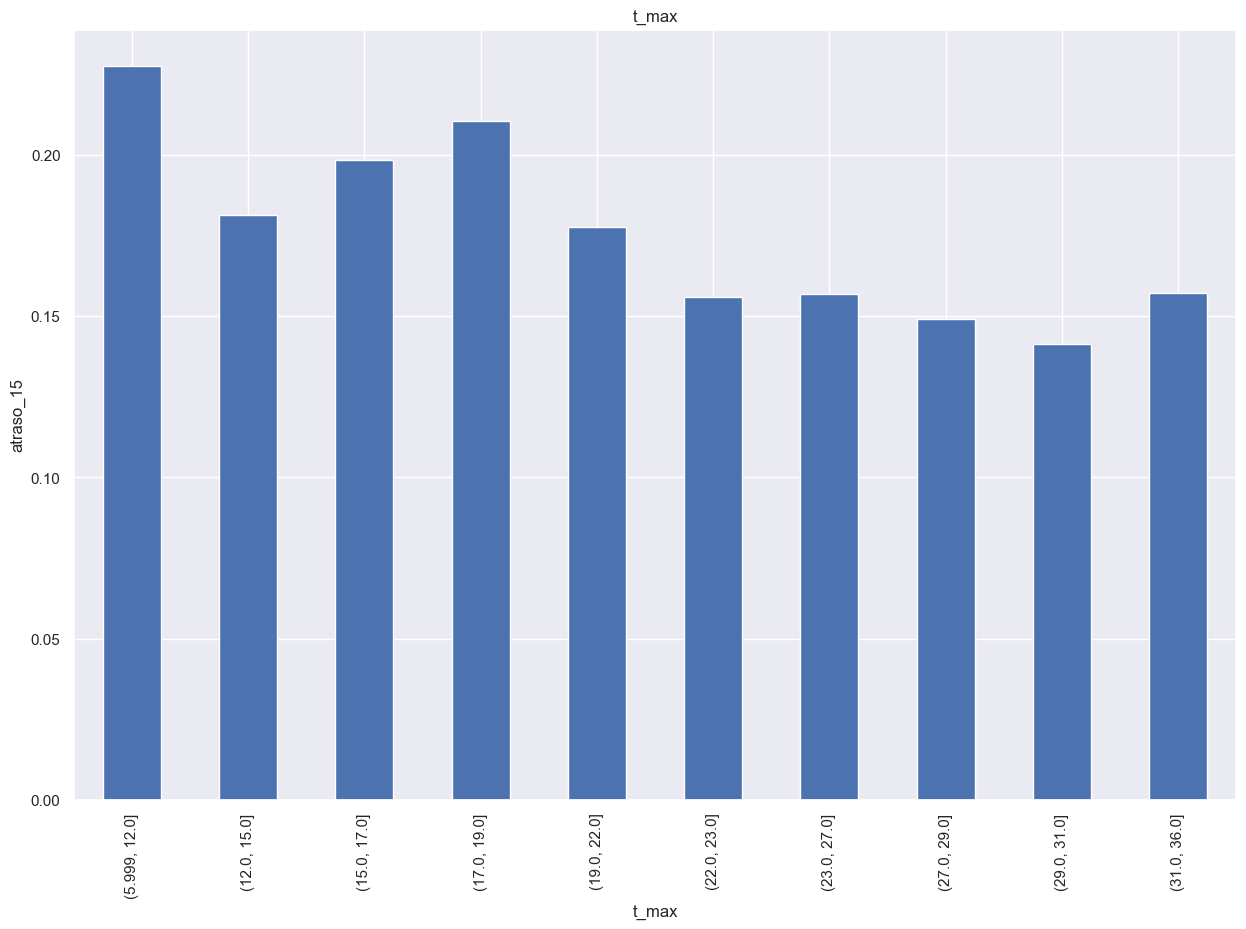

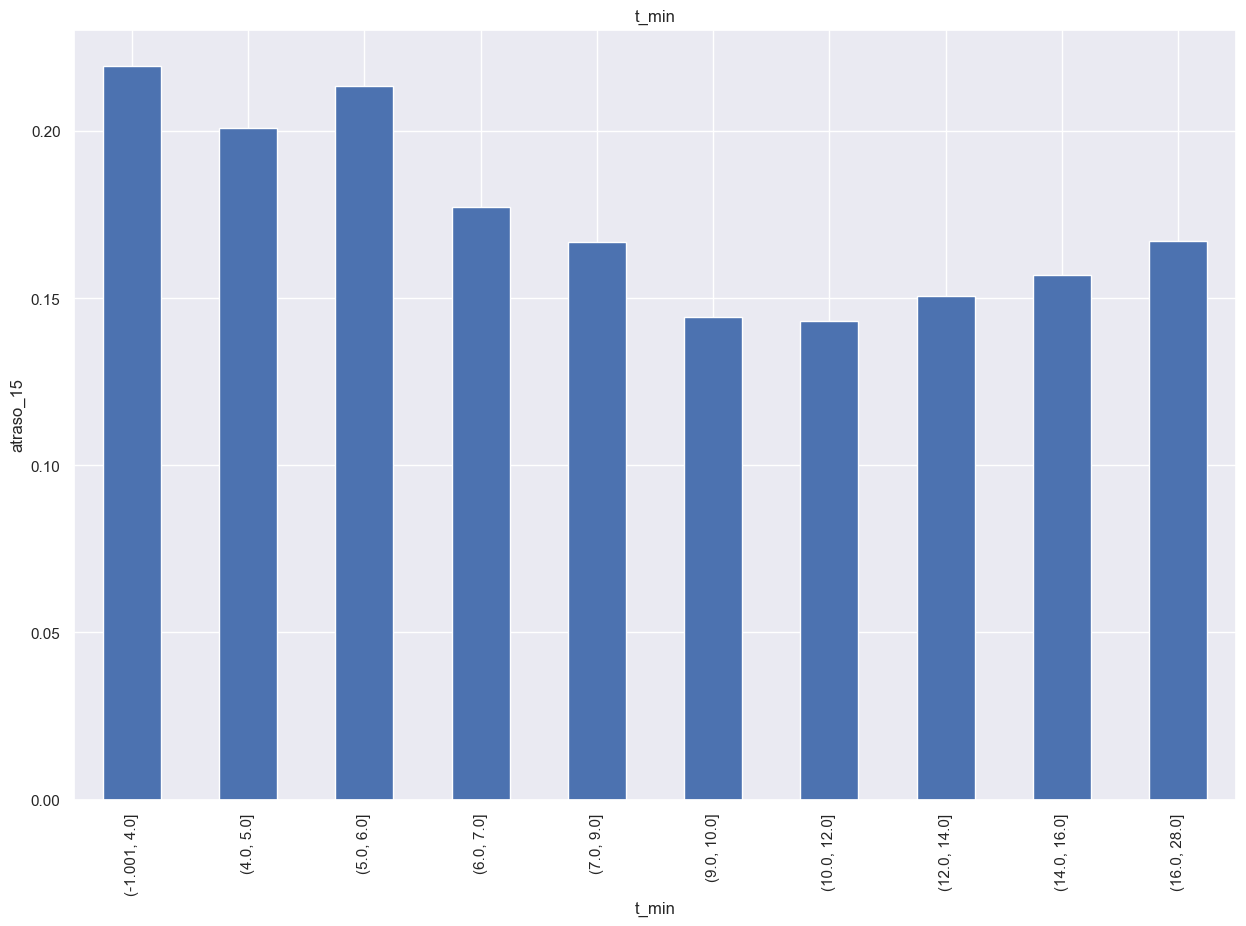

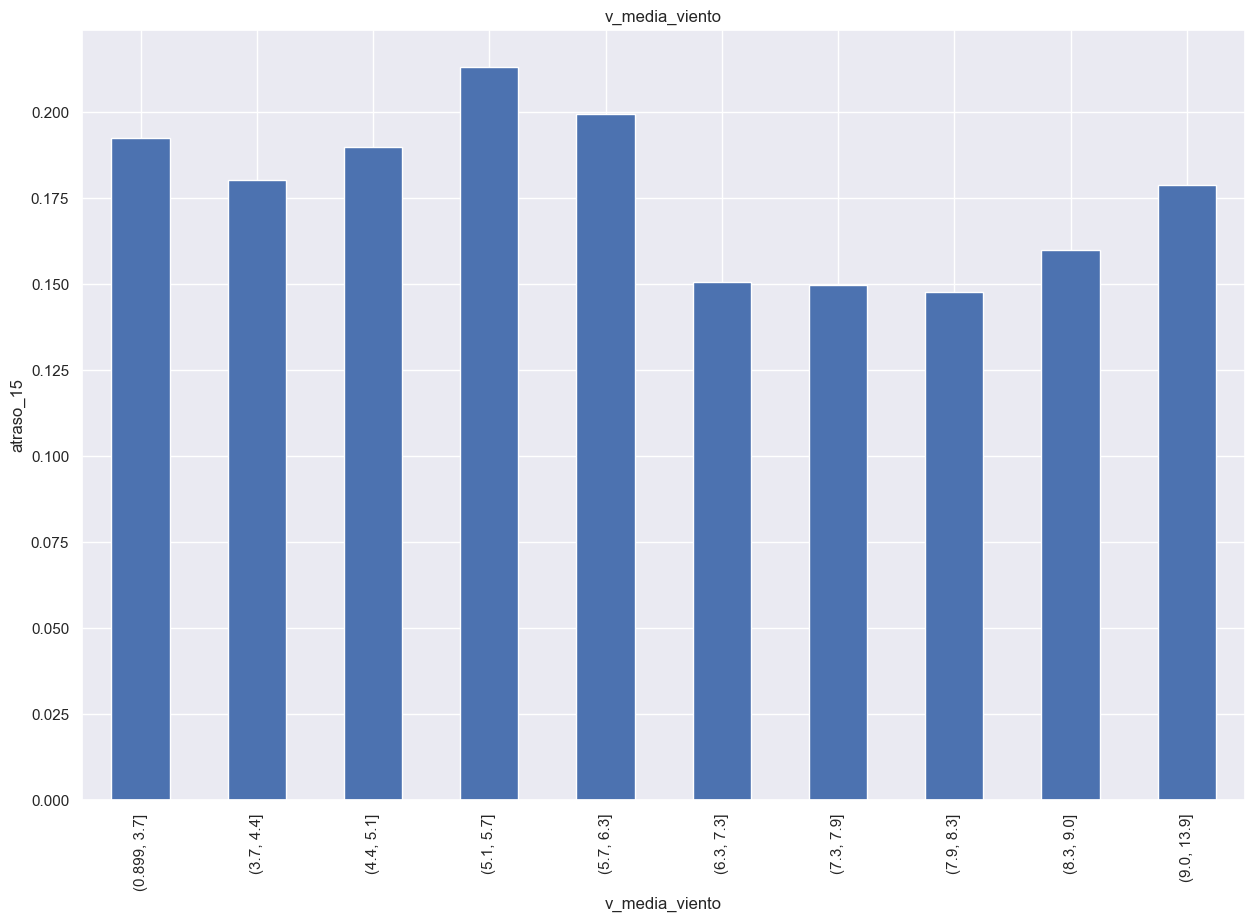

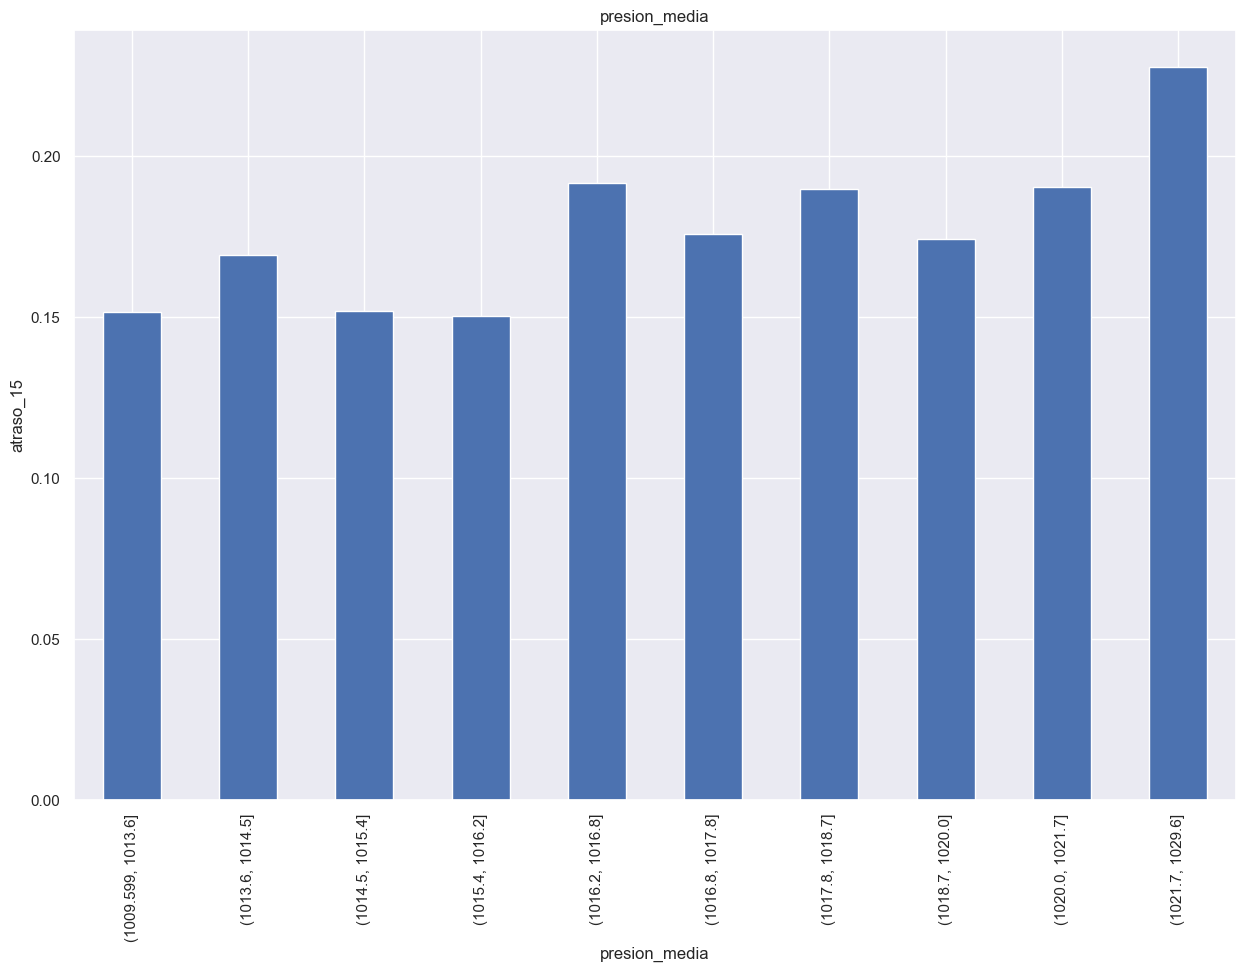

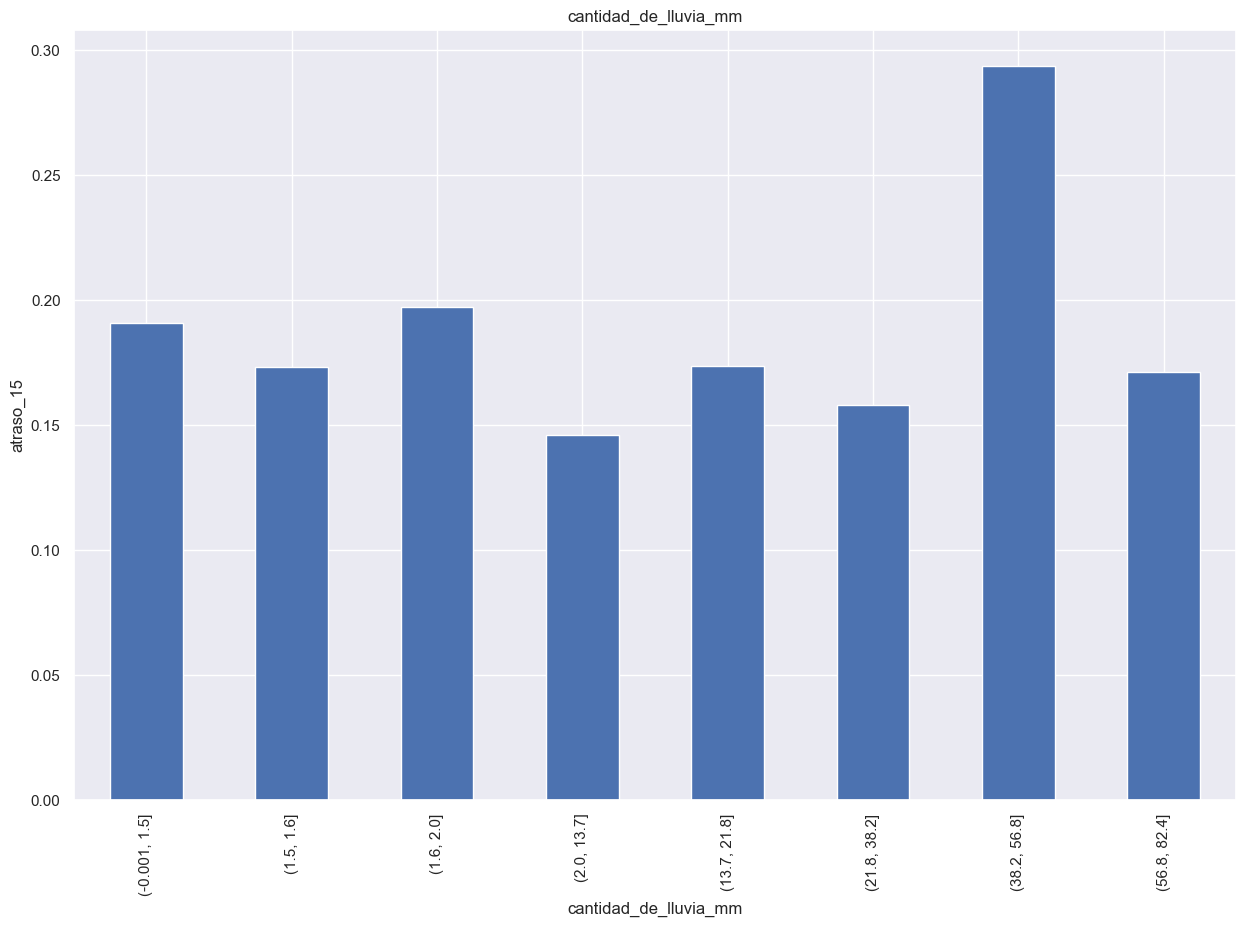

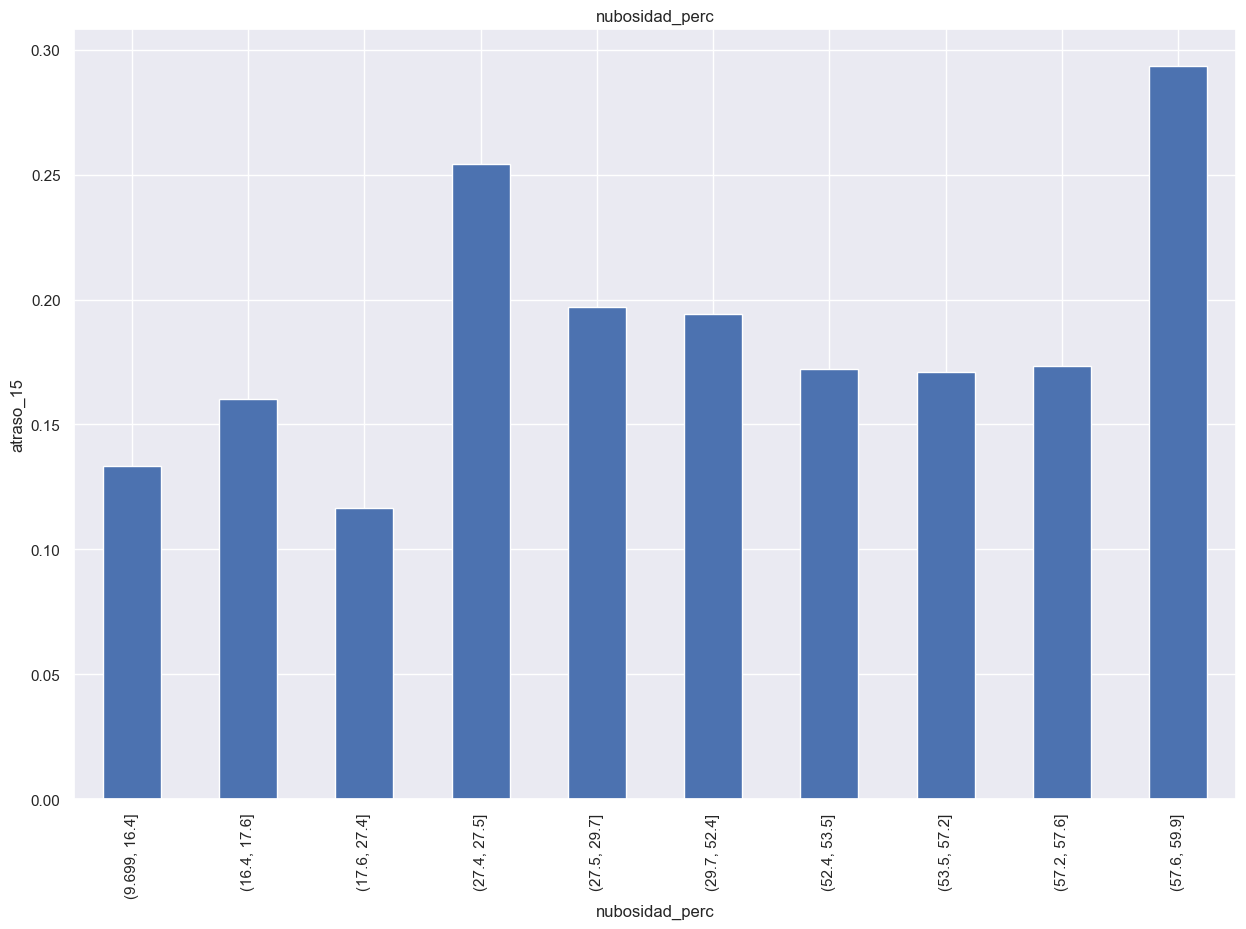

In [65]:
for feature in var_propias[1:]:
    data = df.copy()
    data[f'deciles_{feature}'] =  pd.qcut(data[feature],q=10,duplicates='drop')
    data.groupby(f'deciles_{feature}')['atraso_15'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('atraso_15')
    plt.title(feature)
    plt.show()

In [70]:
df_corr = df[['t_media','t_max', 't_min', 'v_media_viento', 'presion_media',
       'cantidad_de_lluvia_mm', 'nubosidad_perc','atraso_15']].corr()
df_corr['atraso_15'].abs().sort_values(ascending=False)

atraso_15                1.000000
t_media                  0.060571
t_max                    0.059967
presion_media            0.052474
t_min                    0.051500
nubosidad_perc           0.051235
cantidad_de_lluvia_mm    0.033962
v_media_viento           0.029482
Name: atraso_15, dtype: float64

In [72]:
var_pred_final = var_pred + ['temporada_alta','periodo_dia']

In [73]:
len(var_pred_final)

18

In [75]:
target = 'atraso_15'

In [77]:
df_model = df[var_pred_final + [target]].copy()
df_model.shape

(68206, 19)

### Train test split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# X & y
X = df_model.drop(target, 1)
y = df_model[target]

In [83]:
print(X.shape, y.shape)

(68206, 18) (68206,)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [85]:
X_train.shape, X_test.shape

((47744, 18), (20462, 18))

In [86]:
y_train.shape, y_test.shape

((47744,), (20462,))

In [87]:
y_train.value_counts(1)

0    0.815034
1    0.184966
Name: atraso_15, dtype: float64

In [88]:
y_test.value_counts(1)

0    0.815121
1    0.184879
Name: atraso_15, dtype: float64

In [48]:
# debido a que 't_min','t_max' tienen una correlacion muy alta contra t_media y a su vez t_media tiene mayor correlacion contra el target
# vamos a eliminar 't_min','t_max' y solo quedarnos con t_media
col_drop = ['t_min','t_max']
X_train.drop(labels=col_drop, axis=1, inplace=True)
X_test.drop(labels=col_drop, axis=1, inplace=True)

In [109]:
X_train.shape, X_test.shape

((47744, 15), (20462, 15))

In [111]:
X_train.columns

Index(['dia', 'mes', 'dianom', 'tipovuelo', 'opera', 'tipo_aerolinea',
       'siglades', 'km-ovsd', 't_media', 'v_media_viento', 'presion_media',
       'cantidad_de_lluvia_mm', 'nubosidad_perc', 'temporada_alta',
       'periodo_dia'],
      dtype='object')

In [1]:
# # checkpoint
# X_train.to_csv('X_train_check1.csv')
# X_test.to_csv('X_test_check1.csv')
# y_train.to_csv('y_train_check1.csv')
# y_test.to_csv('y_testcheck1.csv')

## PyCaret
Vamos a utilizar PyCaret y MLFlow para hacer experimentos probando distintas tecnicas de preprocesamiento y modelado para intentar mejorar el modelo de Juan

In [3]:
import pycaret
pycaret.__version__

# import pycaret classification and init setup
from pycaret.classification import *

'3.0.0'

In [7]:
X_train= pd.read_csv('../data/processed/checkpoints/X_train_check1.csv', index_col=[0])
X_test = pd.read_csv('../data/processed/checkpoints/X_test_check1.csv', index_col=[0])
y_train = pd.read_csv('../data/processed/checkpoints/y_train_check1.csv', index_col=[0])
y_test = pd.read_csv('../data/processed/checkpoints/y_testcheck1.csv', index_col=[0])

In [49]:
#pycaret.show_versions()

In [8]:
X_train.columns

Index(['dia', 'mes', 'dianom', 'tipovuelo', 'opera', 'tipo_aerolinea',
       'siglades', 'km-ovsd', 't_media', 'v_media_viento', 'presion_media',
       'cantidad_de_lluvia_mm', 'nubosidad_perc', 'temporada_alta',
       'periodo_dia'],
      dtype='object')

In [10]:
X_train.shape

(47744, 15)

In [11]:
X_train.head()

,dia,mes,dianom,tipovuelo,opera,tipo_aerolinea,siglades,km_ovsd,t_media,v_media_viento,presion_media,cantidad_de_lluvia_mm,nubosidad_perc,temporada_alta,periodo_dia
3762,16,9,Sabado,N,Sky Airline,Low Cost,Antofagasta,1086.84,21.0,6.1,1015.5,13.7,53.5,1,tarde
64209,9,12,Sabado,I,Grupo LATAM,Tradicional,Sao Paulo,2595.13,NaN,NaN,NaN,1.5,27.5,0,mañana
15502,26,8,Sabado,I,K.L.M.,Tradicional,Buenos Aires,1124.93,11.0,5.3,1019.7,21.8,57.6,0,mañana
26174,10,1,Martes,N,Grupo LATAM,Tradicional,Concepcion,440.52,25.0,10.1,1014.7,0.0,17.6,1,noche
10325,3,3,Viernes,I,Avianca,Tradicional,Bogota,4252.23,22.0,6.6,1014.2,1.6,16.4,0,tarde


In [12]:
X_train.select_dtypes(exclude='object').dtypes

dia                        int64
mes                        int64
km_ovsd                  float64
t_media                  float64
v_media_viento           float64
presion_media            float64
cantidad_de_lluvia_mm    float64
nubosidad_perc           float64
temporada_alta             int64
dtype: object

In [14]:
X_train.describe()

,dia,mes,km_ovsd,t_media,v_media_viento,presion_media,cantidad_de_lluvia_mm,nubosidad_perc,temporada_alta
count,47744.000000,47744.000000,47744.000000,40580.000000,40580.000000,40580.000000,47744.000000,47744.000000,47744.000000
mean,15.708927,6.631095,2163.554017,17.308625,6.436390,1017.352134,17.661610,36.959132,0.323894
std,8.774285,3.526654,2364.675624,6.076463,2.127215,3.229722,25.057585,17.333604,0.467965
min,1.000000,1.000000,172.000000,4.000000,0.900000,1009.600000,0.000000,9.700000,0.000000
25%,8.000000,3.000000,918.000000,12.000000,4.800000,1015.000000,1.500000,17.600000,0.000000
50%,16.000000,7.000000,1229.000000,17.000000,6.300000,1016.800000,2.000000,29.700000,0.000000
75%,23.000000,10.000000,2466.000000,22.000000,8.000000,1019.500000,21.800000,53.500000,1.000000
max,31.000000,12.000000,11901.000000,30.000000,13.900000,1029.600000,82.400000,59.900000,1.000000


In [15]:
X_train.dtypes

dia                        int64
mes                        int64
dianom                    object
tipovuelo                 object
opera                     object
tipo_aerolinea            object
siglades                  object
km_ovsd                    int64
t_media                  float64
v_media_viento           float64
presion_media            float64
cantidad_de_lluvia_mm    float64
nubosidad_perc           float64
temporada_alta             int64
periodo_dia               object
dtype: object

In [16]:
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

In [19]:
name = 'latam_0.1.0' 

s = setup(pd.concat([X_train, y_train],1), target = 'atraso_15', session_id = 123
          ,normalize=True, normalize_method='minmax' # robust, zscore, minmax - OK
          ,imputation_type='simple', numeric_imputation='median' # simple, iterative - OK
          ,fix_imbalance=True, fix_imbalance_method='RandomUnderSampler' #NearMiss, RandomUnderSampler - OK
          #,remove_outliers=True, outliers_method='iforest', outliers_threshold= 0.01 # 0.05, 0.02 - OK
          ,remove_outliers=False
          #,rare_to_value = 0.05 # 0.02, 0.05, 0.1 - OK
          #,feature_selection=True, feature_selection_method='classic', n_features_to_select=0.5 #'classic', sequential - OK
          
          , experiment_name = name
           ,log_experiment=True
          )

,Description,Value
0,Session id,123
1,Target,atraso_15
2,Target type,Binary
3,Original data shape,"(47744, 10)"
4,Transformed data shape,"(26688, 10)"
5,Transformed train set shape,"(12364, 10)"
6,Transformed test set shape,"(14324, 10)"
7,Numeric features,9
8,Rows with missing values,15.0%
9,Preprocess,True


2023/03/29 16:57:48 INFO mlflow.tracking.fluent: Experiment with name 'latam_0.1.0' does not exist. Creating a new experiment.


In [20]:
#models()

In [21]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/lh/lp38lfv52zb_kgpv2bg7f_3c0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['dia', 'mes', 'km_ovsd', 't_media',
                                             'v_media_viento', 'presion_media',
                                             'cantidad_de_lluvia_mm',
                                             'nubosidad_perc',
                                             'temporada_alta'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_val...
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('balance',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=RandomUnderSampler(random_state=None,
                                                                                           replacement=False,
                                                                                           sampling_strategy='auto')))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1))))],
         verbose=False)

In [22]:
#!mlflow ui

In [24]:
get_config('X_train_transformed').shape

(12364, 9)

In [25]:
get_config('y_train_transformed').value_counts(1)

1    0.5
0    0.5
Name: atraso_15, dtype: float64

In [26]:
# compare baseline models
mod_lst = ['lr','dt', 'rf', 'et', 'gbc', 'lightgbm']
best = compare_models(sort='F1', include = mod_lst, n_select=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:59:15
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5427,0.5761,0.5815,0.2209,0.3200,0.0709,0.0897,0.6680
dt,Decision Tree Classifier,0.5982,0.5757,0.5044,0.2312,0.3171,0.0850,0.0980,0.4000


In [28]:
# Seleccionamos el segundo mejor modelo debido a que LightGBM nos presentaba un problema de dependencias al momento de exponerlo a en la API
best[1]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
# Seleccionamos el segundo mejor modelo debido a que LightGBM nos presentaba un problema de dependencias al momento de exponerlo a en la API
best = best[1]

In [30]:
create_model(best, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:03:24
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
# start mlflow server on localhost:5000
#!mlflow ui

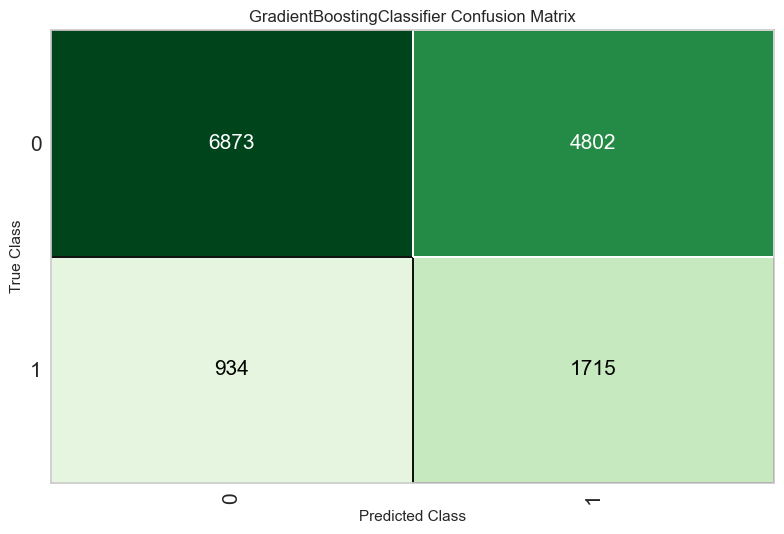

In [32]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

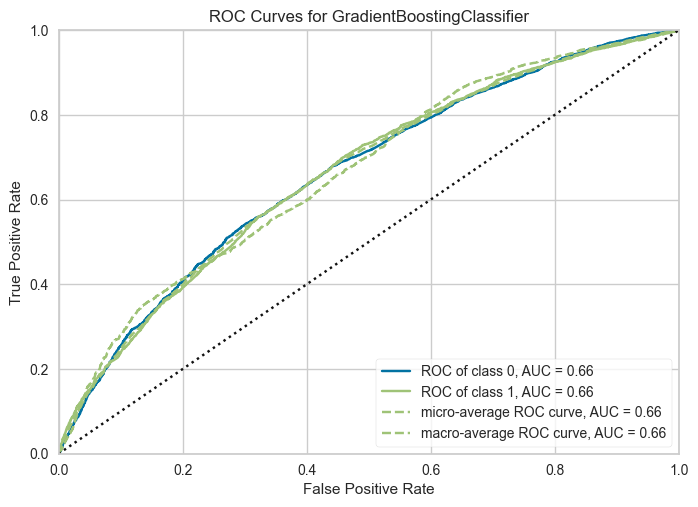

In [33]:
# plot AUC
plot_model(best, plot = 'auc')

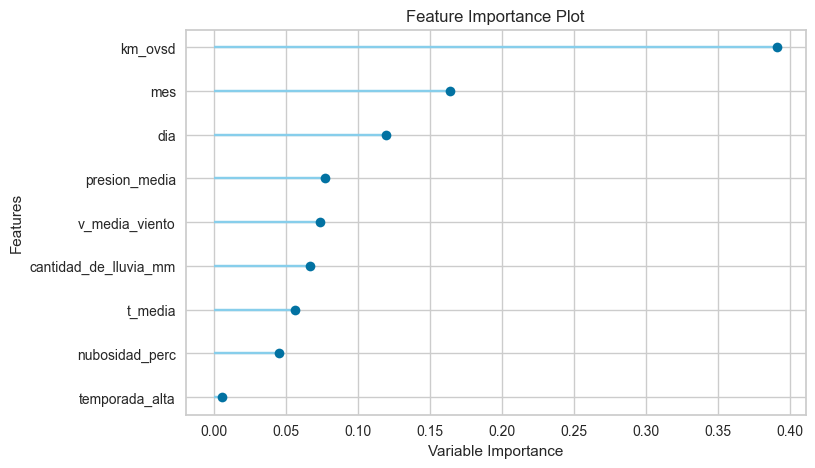

In [34]:
# plot feature importance
plot_model(best, plot = 'feature')

In [35]:
# evaluate_model(best)

In [36]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5996,0.6633,0.6474,0.2632,0.3742,0.1509,0.1841


In [37]:
get_config('X_train_transformed')

,dia,mes,km_ovsd,t_media,v_media_viento,presion_media,cantidad_de_lluvia_mm,nubosidad_perc,temporada_alta
50916,0.833333,0.818182,0.098815,0.538462,0.669231,0.385001,0.019417,0.567729,0.0
45802,0.633333,1.000000,0.195584,0.500000,0.415385,0.360001,0.018204,0.354582,1.0
10429,0.866667,0.181818,0.347856,0.692308,0.446154,0.320001,0.019417,0.133466,0.0
13397,0.833333,0.272727,0.081166,0.423077,0.276923,0.540002,0.047330,0.352590,0.0
37261,0.900000,0.909091,0.110495,0.500000,0.415385,0.360001,0.024272,0.398406,0.0
...,...,...,...,...,...,...,...,...,...
43825,0.133333,0.545455,0.195584,0.115385,0.330769,0.560001,0.689320,1.000000,0.0
7111,0.133333,0.545455,0.127036,0.115385,0.330769,0.560001,0.689320,1.000000,0.0
16003,0.300000,0.727273,0.081166,0.153846,0.415385,0.800000,0.166262,0.872510,0.0
50690,0.300000,0.545455,0.098815,0.269231,0.138462,0.440002,0.689320,1.000000,0.0


In [38]:
holdout_pred.head()

,dia,mes,km_ovsd,t_media,v_media_viento,presion_media,cantidad_de_lluvia_mm,nubosidad_perc,temporada_alta,atraso_15,prediction_label,prediction_score
18443,24,2,1229,27.0,8.2,1014.299988,0.000000,9.700000,1,0,0,0.6702
11984,18,1,1124,29.0,8.5,1013.200012,0.000000,17.600000,1,0,1,0.5278
688,15,2,1086,25.0,8.2,1017.599976,0.000000,9.700000,1,0,0,0.6509
24976,21,6,4808,10.0,4.4,1013.700012,82.400002,57.200001,0,0,0,0.7117
43774,30,7,2466,13.0,4.6,1019.500000,56.799999,59.900002,1,0,1,0.6184


In [39]:
# # save a sample to test the api later

# import json

# sample_line = get_config('X_train_transformed').reset_index(drop=True).iloc[0,:].to_dict()

# # define the filename for the JSON file
# filename = "../ML-FASTAPI-DOCKER-HEROKU/sample2.json"

# # write the dictionary to a JSON file
# with open(filename, "w") as f:
#     json.dump(sample_line, f)

In [40]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
# train a dt model with default params
gbc = create_model(best, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:05:05
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


In [42]:
from scipy.stats import randint as sp_randint
import numpy as np

In [44]:
# tune model with metric = F1
param_grid = {'n_estimators': [10,20,50,70,80],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
              'max_depth': [2, 3, 4, 5, 6],
              'min_samples_split': np.linspace(0.1, 1.0, 10),
              'min_samples_leaf': np.linspace(0.1, 0.5, 5),
              'max_features': ['sqrt', 'log2', None]
             }

tuned_gbc_rands = tune_model(gbc, optimize = 'F1', n_iter=100, fold=5, custom_grid=param_grid
                        , return_train_score=True
                        ,choose_better = True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:11:03
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [46]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
tuned_gbc_rands

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

el randomize search no encontro un set de hyperparametros que supere al baseline por lo tanto nos quedamos con el baseline

In [47]:
tuned_gbc_optuna = tune_model(gbc, optimize = 'F1'
                        ,search_library = 'optuna'
                        #, n_iter=100, fold=5
                        #, custom_grid=param_grid
                        , return_train_score=True
                        ,choose_better = True
                        )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:17:21
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


[I 2023-03-29 17:17:21,375] Searching the best hyperparameters using 33420 samples...


In [50]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
tuned_gbc_optuna

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.00010569523079639144,
                           loss='log_loss', max_depth=9,
                           max_features=0.6762226281176453, max_leaf_nodes=None,
                           min_impurity_decrease=0.0006873512814649531,
                           min_samples_leaf=4, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=221,
                           n_iter_no_change=None, random_state=123,
                           subsample=0.7775410766753936, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Optuna encontro un set de hyperparameters que le ganan al baseline pero el upgrade en performance es demasiado pequeno y por otro lado vemos que crece el overfitting por lo tanto vamos a quedarnos con el baseline

In [52]:
# tune model with metric = F1
param_grid = {'n_estimators': [20,30,40,50],
              'max_depth': [2, 3, 4, 5],
              'learning_rate': [0.01, 0.05, 0.1],
              #'num_leaves': [5, 10, 20, 40],
              #'min_child_samples': [10, 20]
              }

tuned_gbc_grids = tune_model(gbc, optimize='F1'
                        # , n_iter=100
                        , fold=5, custom_grid=param_grid,
                        search_algorithm='grid', return_train_score=True
                        , choose_better=True
                        )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:42:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [53]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
tuned_gbc_grids

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Intentamos randomizesearch, gridsearch y optunapero ninguna opcion fue mejor que el baseline

In [55]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [61]:
holdout_pred_ok = predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5996,0.6633,0.6474,0.2632,0.3742,0.1509,0.1841


In [62]:
#evaluate_model(gbc_ok)

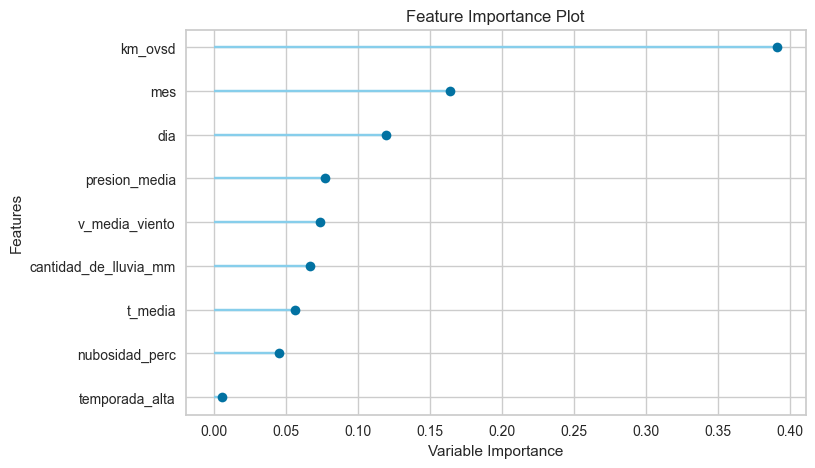

In [63]:
plot_model(gbc, plot='feature')

In [65]:
final_gbc = finalize_model(gbc)

In [66]:
_ = predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6074,0.6753,0.6621,0.2706,0.3841,0.1649,0.2005


In [67]:
type(final_gbc)

pycaret.internal.pipeline.Pipeline

In [68]:
final_gbc

Pipeline(memory=FastMemory(location=/var/folders/lh/lp38lfv52zb_kgpv2bg7f_3c0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['dia', 'mes', 'km_ovsd', 't_media',
                                             'v_media_viento', 'presion_media',
                                             'cantidad_de_lluvia_mm',
                                             'nubosidad_perc',
                                             'temporada_alta'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_val...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

In [69]:
X_train.shape, X_test.shape

((47744, 9), (20462, 9))

In [70]:
X_train.columns

Index(['dia', 'mes', 'km_ovsd', 't_media', 'v_media_viento', 'presion_media',
       'cantidad_de_lluvia_mm', 'nubosidad_perc', 'temporada_alta'],
      dtype='object')

In [71]:
X_train.dtypes

dia                        int64
mes                        int64
km_ovsd                    int64
t_media                  float64
v_media_viento           float64
presion_media            float64
cantidad_de_lluvia_mm    float64
nubosidad_perc           float64
temporada_alta             int64
dtype: object

### Evaluacion sobre nuestro test set
Pycaret se guarda un holdout set para hacer las validaciones pero debido a que nosotros le pasamos nuestro set de train a Pycaret, todavia tenemos un set de test que los experimentos de Pycaret no vieron ni usaron para evaluarse.

En esta seccion haremos la evaluacion con dicho set de test

In [77]:
y_pred = final_gbc.predict(X_test)
y_pred.shape

(20462,)

In [78]:
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int8)

In [79]:
y_test.shape

(20462, 1)

In [80]:
y_test

,atraso_15
27320,0
57460,1
54916,0
34252,1
13524,0
...,...
52356,0
47513,0
21109,0
45425,0


In [81]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# assume y_true and y_pred are your true labels and predicted labels, respectively
# y_pred should be the predicted probability of class 1 for each sample

acu = accuracy_score(y_test, y_pred)
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
# calculate precision
precision = precision_score(y_test, y_pred)
# calculate recall
recall = recall_score(y_test, y_pred)
# calculate F1-score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acu:.3f}")
print(f"AUC: {auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.604
AUC: 0.619
Precision: 0.265
Recall: 0.644
F1-score: 0.375


---

Fin